<a href="https://colab.research.google.com/github/ddopazo92/Introduccion_datascience_diego_dopazo/blob/main/ProyectoDSParteI%2BDopazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL - VISUALIZACIONES DE PYTHON

PRIMERA ENTREGA

# Abstract

***En este proyecto trabajamos con el dataset Video_games.csv que contiene información sobre los videojuegos, sus ventas por region, el puntaje segun criticos y usuarios, los publicadores y los desarrolladores de estos mismos.***

***El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para identificar patrones relevantes, relaciones entre variables y posibles anomalías o factores que influyen en los video juegos. A través de gráficos univariados, bivariados y multivariados, se buscará responder una serie de preguntas o hipótesis planteadas sobre el comportamiento de los datos.***

***El análisis incluye una limpieza previa de datos, identificación de valores perdidos, y selección de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados visuales y numéricos se busca brindar una interpretación que permita entender mejor el fenómeno analizado.***

***El proyecto se estructura en etapas: definición de preguntas, diagnóstico visual, interpretación, y preparación para análisis posteriores como modelado o segmentación.***






# **Preguntas de interes:**





1 - Cuales son los generos de juegos que predominan las ventas por region?

---
2 - Cuales son las consolas que predominan por cada genero de juego?

---
3 - Cuales son los juegos mejor puntuados en promedio (critica + usuarios)

---
4 - Cuales son los juegos mas vendidos?

---
5 - Los juegos mas vendidos, tienen alguna relacion con las puntuaciones
promedio mas altas de los mismos?

---
6 - Cual es la region que tiene las mayores ventas de juegos?

---
7 - Como evolucionaron las ventas de juegos en las diferentes regiones y en general?

---






## **Objetivo del proyecto:**

El objetivo de este proyecto es poder predecir las ventas globales de un videojuego en función de características como su Género, Plataforma, Año de lanzamiento, Puntuación promedio (críticos + usuarios) y la Región de ventas (USA, Europa, Japón y Resto del mundo).
Tambien clasificar si un juego será un éxito o fracaso comercial.
Y un análisis de Tendencia Temporal con el objetivo de predecir ventas futuras o popularidad de géneros/plataformas a lo largo del tiempo.

# *# VISUALIZACIONES Y ANALISIS*

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


url = 'https://raw.githubusercontent.com/ddopazo92/Introduccion_datascience_diego_dopazo/refs/heads/main/Video_Games.csv'

df = pd.read_csv(url, sep=';')

##REEMPLAZO DE PALABRAS EN INGLES A ESPAÑOL
df = df.set_axis(['Juego', 'Consola', 'Año de lanzamiento','Genero', 'Publicador', 'Ventas USA','Ventas Europa', 'Ventas Japon','Ventas resto del Mundo',
                  'Ventas Totales', 'Puntuacion de criticos','Cantidad de criticos', 'Puntaje de Usuario','Cantidad de usuarios','Desarrollador','Clasificacion por Edad'], axis=1)

df['Juego'] = df['Juego'].str.upper()
df['Genero'] = df['Genero'].str.replace('Action','Accion')
df['Genero'] = df['Genero'].str.replace('Adventure','Aventura')
df['Genero'] = df['Genero'].str.replace('Fighting','Lucha')
df['Genero'] = df['Genero'].str.replace('Misc','Miscelania')
df['Genero'] = df['Genero'].str.replace('Platform','Plataforma')
df['Genero'] = df['Genero'].str.replace('Racing','Carreras')
df['Genero'] = df['Genero'].str.replace('Role-Playing','RPG')
df['Genero'] = df['Genero'].str.replace('Shooter','Disparos')
df['Genero'] = df['Genero'].str.replace('Simulation','Simulacion')
df['Genero'] = df['Genero'].str.replace('Sports','Deportes')
df['Genero'] = df['Genero'].str.replace('Strategy','Estrategia')

#convierto la columna 'Año de lanzamiento' de int a datatime64
df['Año de lanzamiento'] = pd.to_datetime(df['Año de lanzamiento'], format='%Y')

#genero un filtro en el rango de fechas para observar los datos dentro del Siglo 21
filtro_rango = (df['Año de lanzamiento'].dt.year >= 1999) & (df['Año de lanzamiento'].dt.year <= 2014)
filtro_rango_1 = (df['Año de lanzamiento'].dt.year >= 1999) & (df['Año de lanzamiento'].dt.year <= 2004)
filtro_rango_2 = (df['Año de lanzamiento'].dt.year >= 2005) & (df['Año de lanzamiento'].dt.year <= 2009)
filtro_rango_3 = (df['Año de lanzamiento'].dt.year >= 2010) & (df['Año de lanzamiento'].dt.year <= 2014)

#LE DI EL MISMO CRITERIO DE PUNTAJE A LOS USAURIOS COMO TIENEN LOS CRITICOS

puntaje_usuarios= [n * 10 for n in df['Puntaje de Usuario']]

##ESTO DA EL PUNTAJE PROMEDIO ENTRE LOS USUARIOS Y LA CRITICA

df['promedio de puntaje']= (df['Puntuacion de criticos'] + puntaje_usuarios)/2
df['cantidad promedio de criticas'] = (df['Cantidad de criticos'] + df['Cantidad de usuarios'])/2








In [ ]:
df.describe()



,Año de lanzamiento,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales,Puntuacion de criticos,Cantidad de criticos,Puntaje de Usuario,Cantidad de usuarios,promedio de puntaje,cantidad promedio de criticas
count,7435,7435.000000,7435.000000,7435.000000,7435.000000,7435.000000,6867.000000,6867.000000,7435.000000,7435.000000,6867.000000,6867.000000
mean,2007-09-09 09:30:34.620040448,0.378238,0.226752,0.060095,0.080040,0.745303,70.265327,28.854522,7.124640,163.157767,71.047546,101.711446
min,1985-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,11.500000,4.000000
25%,2004-01-01 00:00:00,0.050000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.400000,10.000000,64.500000,15.000000
50%,2008-01-01 00:00:00,0.140000,0.060000,0.000000,0.020000,0.280000,72.000000,24.000000,7.500000,24.000000,73.500000,27.500000
75%,2011-01-01 00:00:00,0.380000,0.200000,0.010000,0.070000,0.720000,80.000000,39.000000,8.200000,81.000000,80.000000,64.000000
max,2016-01-01 00:00:00,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000,95.000000,5348.500000
std,NaN,0.933143,0.663916,0.276583,0.260859,1.892162,13.863650,19.201735,1.500294,564.631862,12.562565,296.498012


# *Histograma*

In [ ]:
def generar_hist(df:pd.DataFrame) -> None:
  fig = plt.figure(figsize=(16, 9))
  df.hist(bins=10, figsize=(16, 9),layout=(3,4), color = 'skyblue', alpha = 0.7, edgecolor = 'black')
  plt.suptitle('Graficos de distribucion', fontsize=16, y=1.02)
  plt.tight_layout()
  plt.show()


<Figure size 1600x900 with 0 Axes>

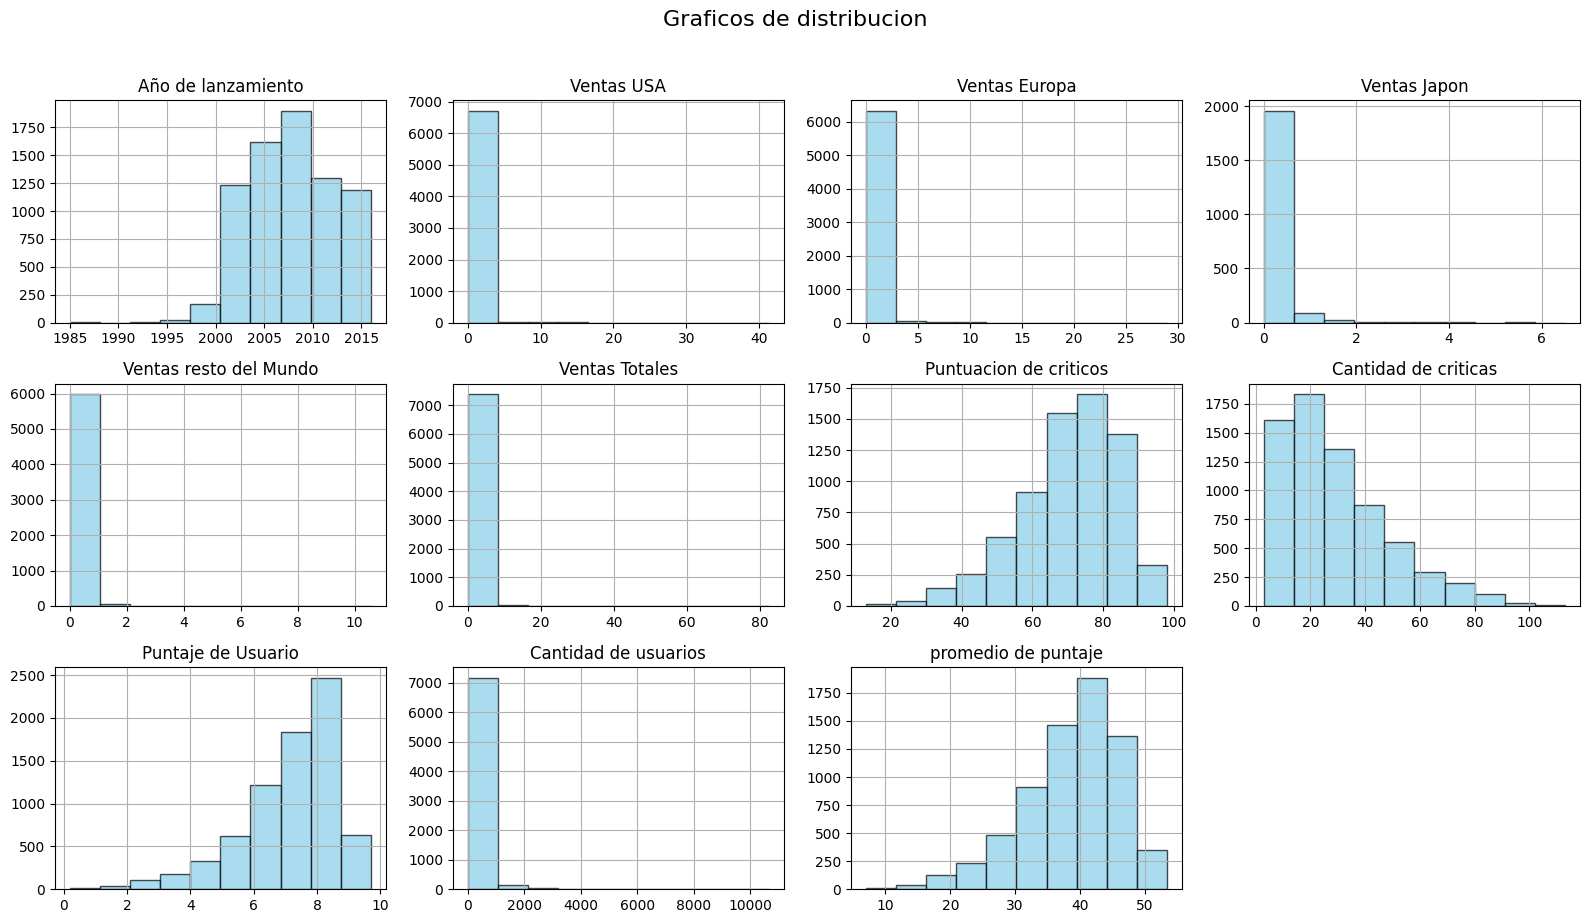

In [ ]:
generar_hist(df)

# GESTION DE DATOS NULOS

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge

In [ ]:
##REEMPLAZO DE LOS DATOS 0 A NaN
df.replace(0,np.nan,inplace=True)

#IDENTIFICA LOS VALORES NULOS EN PORCENTAJE SEGUN LA COLUMNA
(df.isna().mean()*100).round(2).sort_values(ascending=False)

,0
Ventas Japon,71.76
Ventas resto del Mundo,18.79
Ventas Europa,14.32
Ventas USA,9.08
cantidad promedio de criticas,7.64
promedio de puntaje,7.64
Cantidad de criticos,7.64
Puntuacion de criticos,7.64
Clasificacion por Edad,1.12
Desarrollador,0.15


In [ ]:
columna_simple_imputer = ['Puntaje de Usuario']
columna_knn_imputer = ['Ventas USA','Ventas Europa','Cantidad de criticos','Puntuacion de criticos','promedio de puntaje','Ventas resto del Mundo']
columna_iterative_imputer = ['Ventas Japon']

In [ ]:
df_imputed = df.copy()

In [ ]:
imputer_simple = SimpleImputer(strategy='median')
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])

In [ ]:
imputer_knn = KNNImputer(n_neighbors=5)
df_imputed[columna_knn_imputer] = imputer_knn.fit_transform(df_imputed[columna_knn_imputer])

In [ ]:
imputer_iterative = IterativeImputer(
    estimator=BayesianRidge(max_iter=500), max_iter = 20,
    random_state=42,
    initial_strategy='median'
)
df_imputed[columna_iterative_imputer] = imputer_iterative.fit_transform(df_imputed[columna_iterative_imputer])

In [ ]:
df_imputed.describe().round(2)

,Año de lanzamiento,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales,Puntuacion de criticos,Cantidad de criticas,Puntaje de Usuario,Cantidad de usuarios,promedio de puntaje
count,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00,7435.00
mean,2007.69,0.40,0.24,0.11,0.09,0.75,70.14,28.57,7.13,163.16,38.65
std,4.30,0.93,0.66,0.27,0.26,1.89,13.52,18.65,1.50,564.63,7.19
min,1985.00,0.01,0.01,0.01,0.01,0.01,13.00,3.00,0.20,4.00,7.00
25%,2004.00,0.08,0.03,0.06,0.01,0.11,62.00,15.00,6.40,10.00,34.50
50%,2008.00,0.16,0.07,0.06,0.03,0.28,72.00,24.00,7.50,24.00,39.66
75%,2011.00,0.39,0.21,0.06,0.07,0.72,80.00,38.00,8.20,81.00,43.85
max,2016.00,41.36,28.96,6.50,10.57,82.53,98.00,113.00,9.70,10665.00,53.40


<Figure size 1600x900 with 0 Axes>

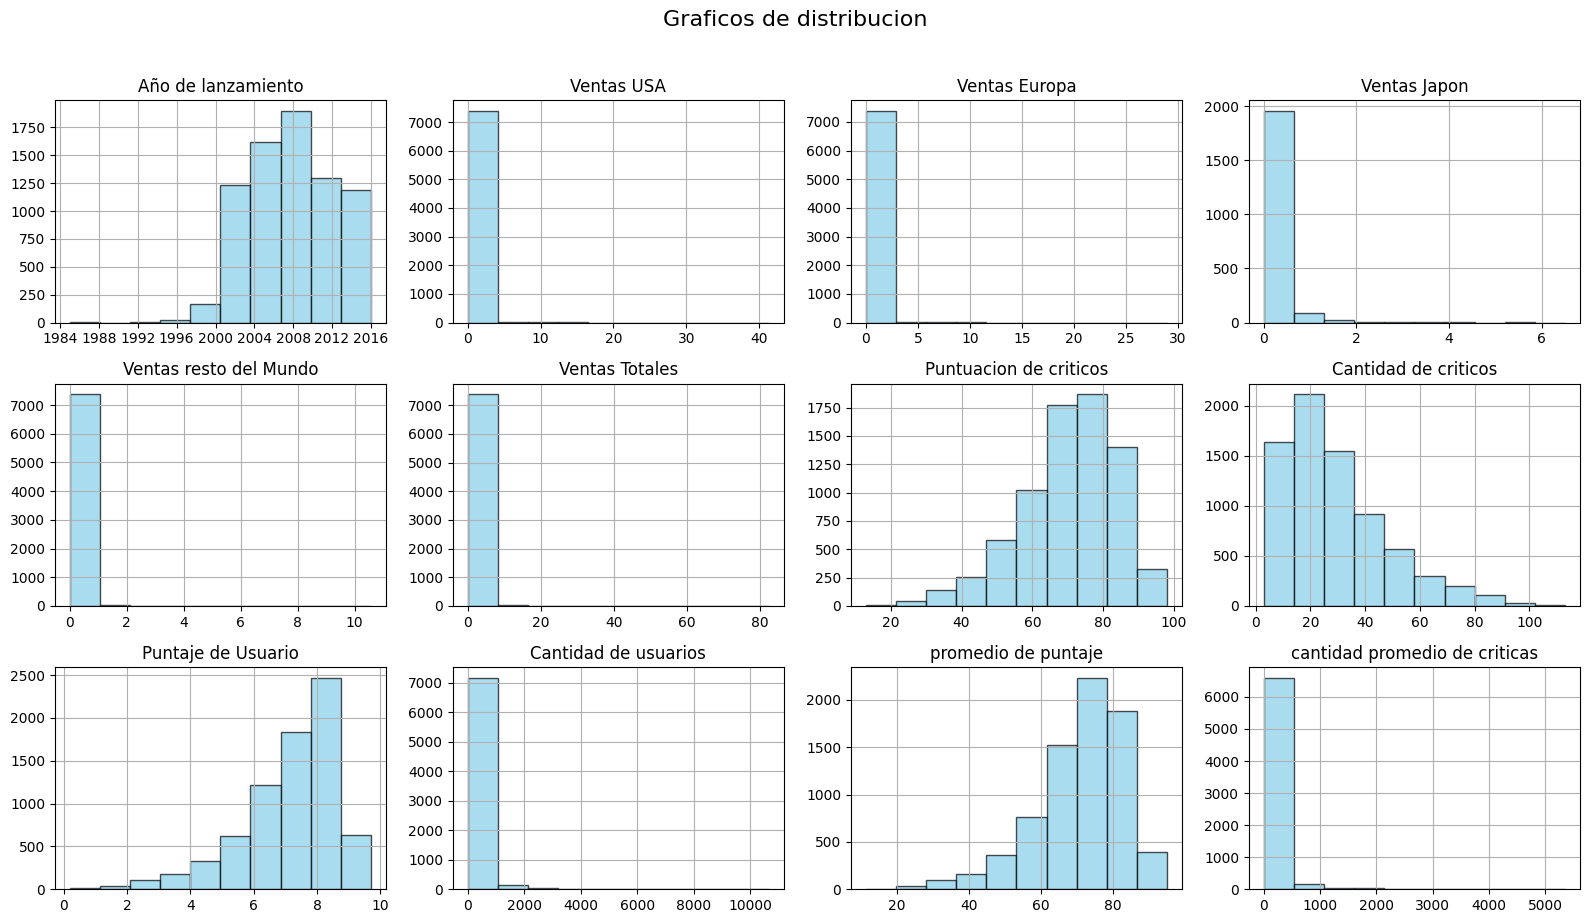

In [ ]:
generar_hist(df_imputed)

# GRAFICO TOP 5 JUEGOS SEGUN LA CRITICA

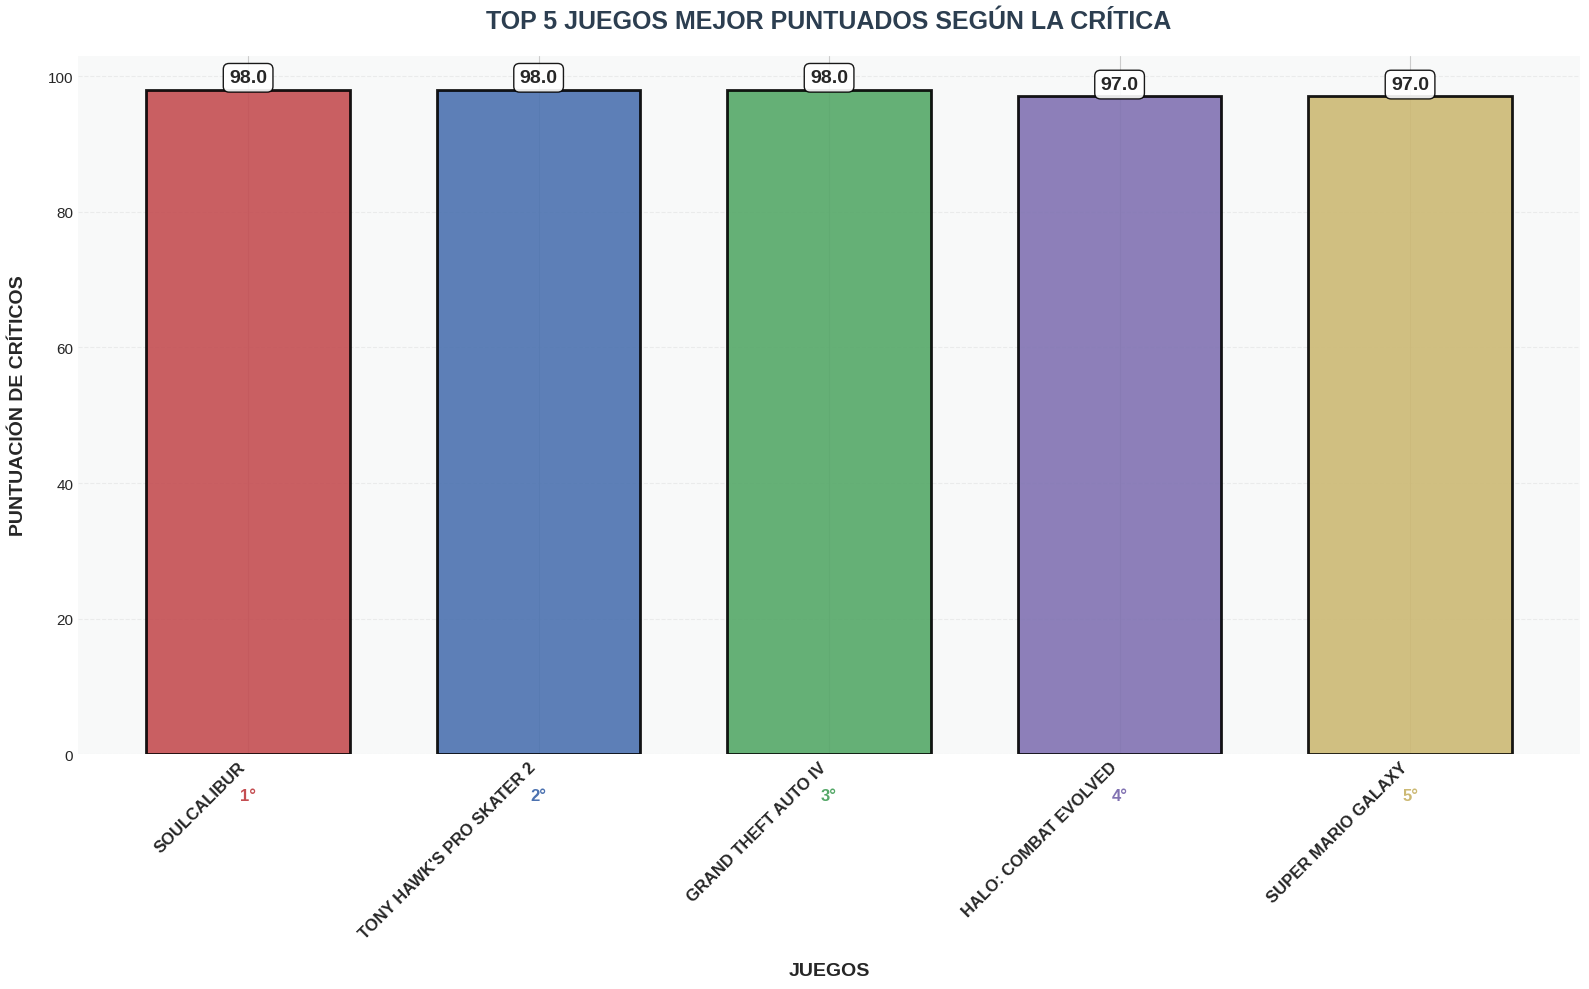


🎯 TOP 5 JUEGOS MEJOR PUNTUADOS POR LA CRÍTICA
POS  JUEGO                          PUNTUACIÓN   GÉNERO          DESARROLLADOR        CONSOLA        
--------------------------------------------------------------------------------
 1°  SOULCALIBUR                  98.0        Lucha          Namco               DC            
 2°  TONY HAWK'S PRO SKATER 2     98.0        Deportes       Neversoft Entertainment PS            
 3°  GRAND THEFT AUTO IV          98.0        Accion         Rockstar North      X360          
 4°  HALO: COMBAT EVOLVED         97.0        Disparos       Bungie Software     XB            
 5°  SUPER MARIO GALAXY           97.0        Plataforma     Nintendo            Wii           
--------------------------------------------------------------------------------


In [ ]:
# Obtener top 5 juegos mejor puntuados por la crítica - ELIMINAR DUPLICADOS PERO MANTENER UNO
top_5_juegos_critica = df.drop_duplicates(subset='Juego', keep='first').sort_values(by='Puntuacion de criticos', ascending=False).head(5)

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 10))

# PALETA DE COLORES MENOS BRILLANTES PERO DISTINGUIBLES
colors = ['#C44E52', '#4C72B0', '#55A868', '#8172B2', '#CCB974']  # Rojo terroso, Azul apagado, Verde oliva, Lavanda, Oro apagado

# Crear gráfico de barras verticales mejorado
bars = ax.bar(top_5_juegos_critica['Juego'],
              top_5_juegos_critica['Puntuacion de criticos'],
              color=colors,
              edgecolor='black',
              linewidth=2,
              alpha=0.9,
              width=0.7)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.1f}',
            ha='center', va='bottom',
            fontsize=14, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='black'))

# Añadir etiquetas de posición
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2, -5,
            f'{i+1}°',
            ha='center', va='top',
            fontsize=12, fontweight='bold', color=colors[i])

# Personalizar el gráfico
ax.set_ylabel('PUNTUACIÓN DE CRÍTICOS', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('JUEGOS', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylim(0, top_5_juegos_critica['Puntuacion de criticos'].max() + 5)

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)

# Grid mejorado
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Fondo y bordes
ax.set_facecolor('#F8F9F9')
for spine in ax.spines.values():
    spine.set_visible(False)

# Título principal
plt.title('TOP 5 JUEGOS MEJOR PUNTUADOS SEGÚN LA CRÍTICA',
          fontsize=18, fontweight='bold', pad=20, color='#2C3E50')

plt.tight_layout()
plt.show()

# TABLA INFORMATIVA
print("\n" + "="*80)
print("🎯 TOP 5 JUEGOS MEJOR PUNTUADOS POR LA CRÍTICA")
print("="*80)
print(f"{'POS':<4} {'JUEGO':<30} {'PUNTUACIÓN':<12} {'GÉNERO':<15} {'DESARROLLADOR':<20} {'CONSOLA':<15}")
print("-"*80)

for i, (idx, row) in enumerate(top_5_juegos_critica.iterrows(), 1):
    print(f"{i:>2}°  {row['Juego']:<28} {row['Puntuacion de criticos']:<11.1f} "
          f"{row['Genero'] if pd.notna(row['Genero']) else 'N/A':<14} "
          f"{row['Desarrollador'] if pd.notna(row['Desarrollador']) else 'N/A':<19} "
          f"{row['Consola'] if pd.notna(row['Consola']) else 'N/A':<14}")

print("-"*80)

In [ ]:
print(df.dtypes)

Juego                             object
Consola                           object
Año de lanzamiento                 int64
Genero                            object
Publicador                        object
Ventas USA                       float64
Ventas Europa                    float64
Ventas Japon                     float64
Ventas resto del Mundo           float64
Ventas Totales                   float64
Puntuacion de criticos           float64
Cantidad de criticos             float64
Puntaje de Usuario               float64
Cantidad de usuarios               int64
Desarrollador                     object
Clasificacion por Edad            object
promedio de puntaje              float64
cantidad promedio de criticas    float64
dtype: object


# GRAFICO TOP 5 JUEGOS SEGUN USUARIOS

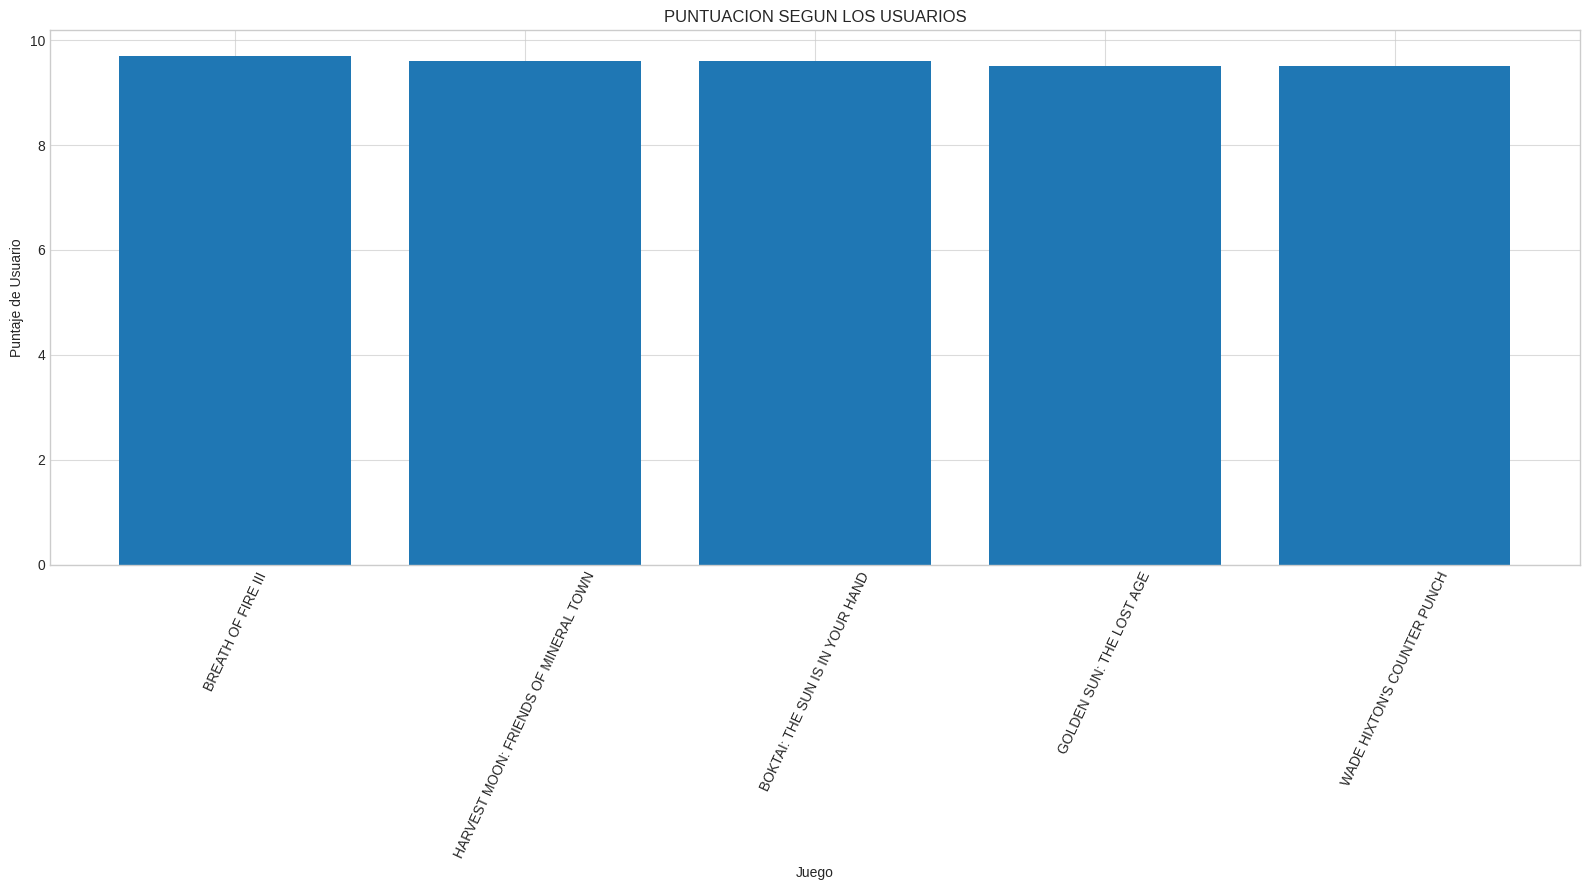

In [ ]:

top_10_juegos_usuarios = df.sort_values(by='Puntaje de Usuario', ascending=False).head(5)



plt.figure(figsize= (16,9))

plt.bar(
      top_10_juegos_usuarios['Juego'],
      top_10_juegos_usuarios['Puntaje de Usuario']

      )

plt.title('PUNTUACION SEGUN LOS USUARIOS')
plt.xlabel('Juego')
plt.ylabel('Puntaje de Usuario')
plt.xticks(rotation=65) # Rotate x-axis labels for better readability
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

#LOS GENEROS MAS VENDIDOS POR REGION

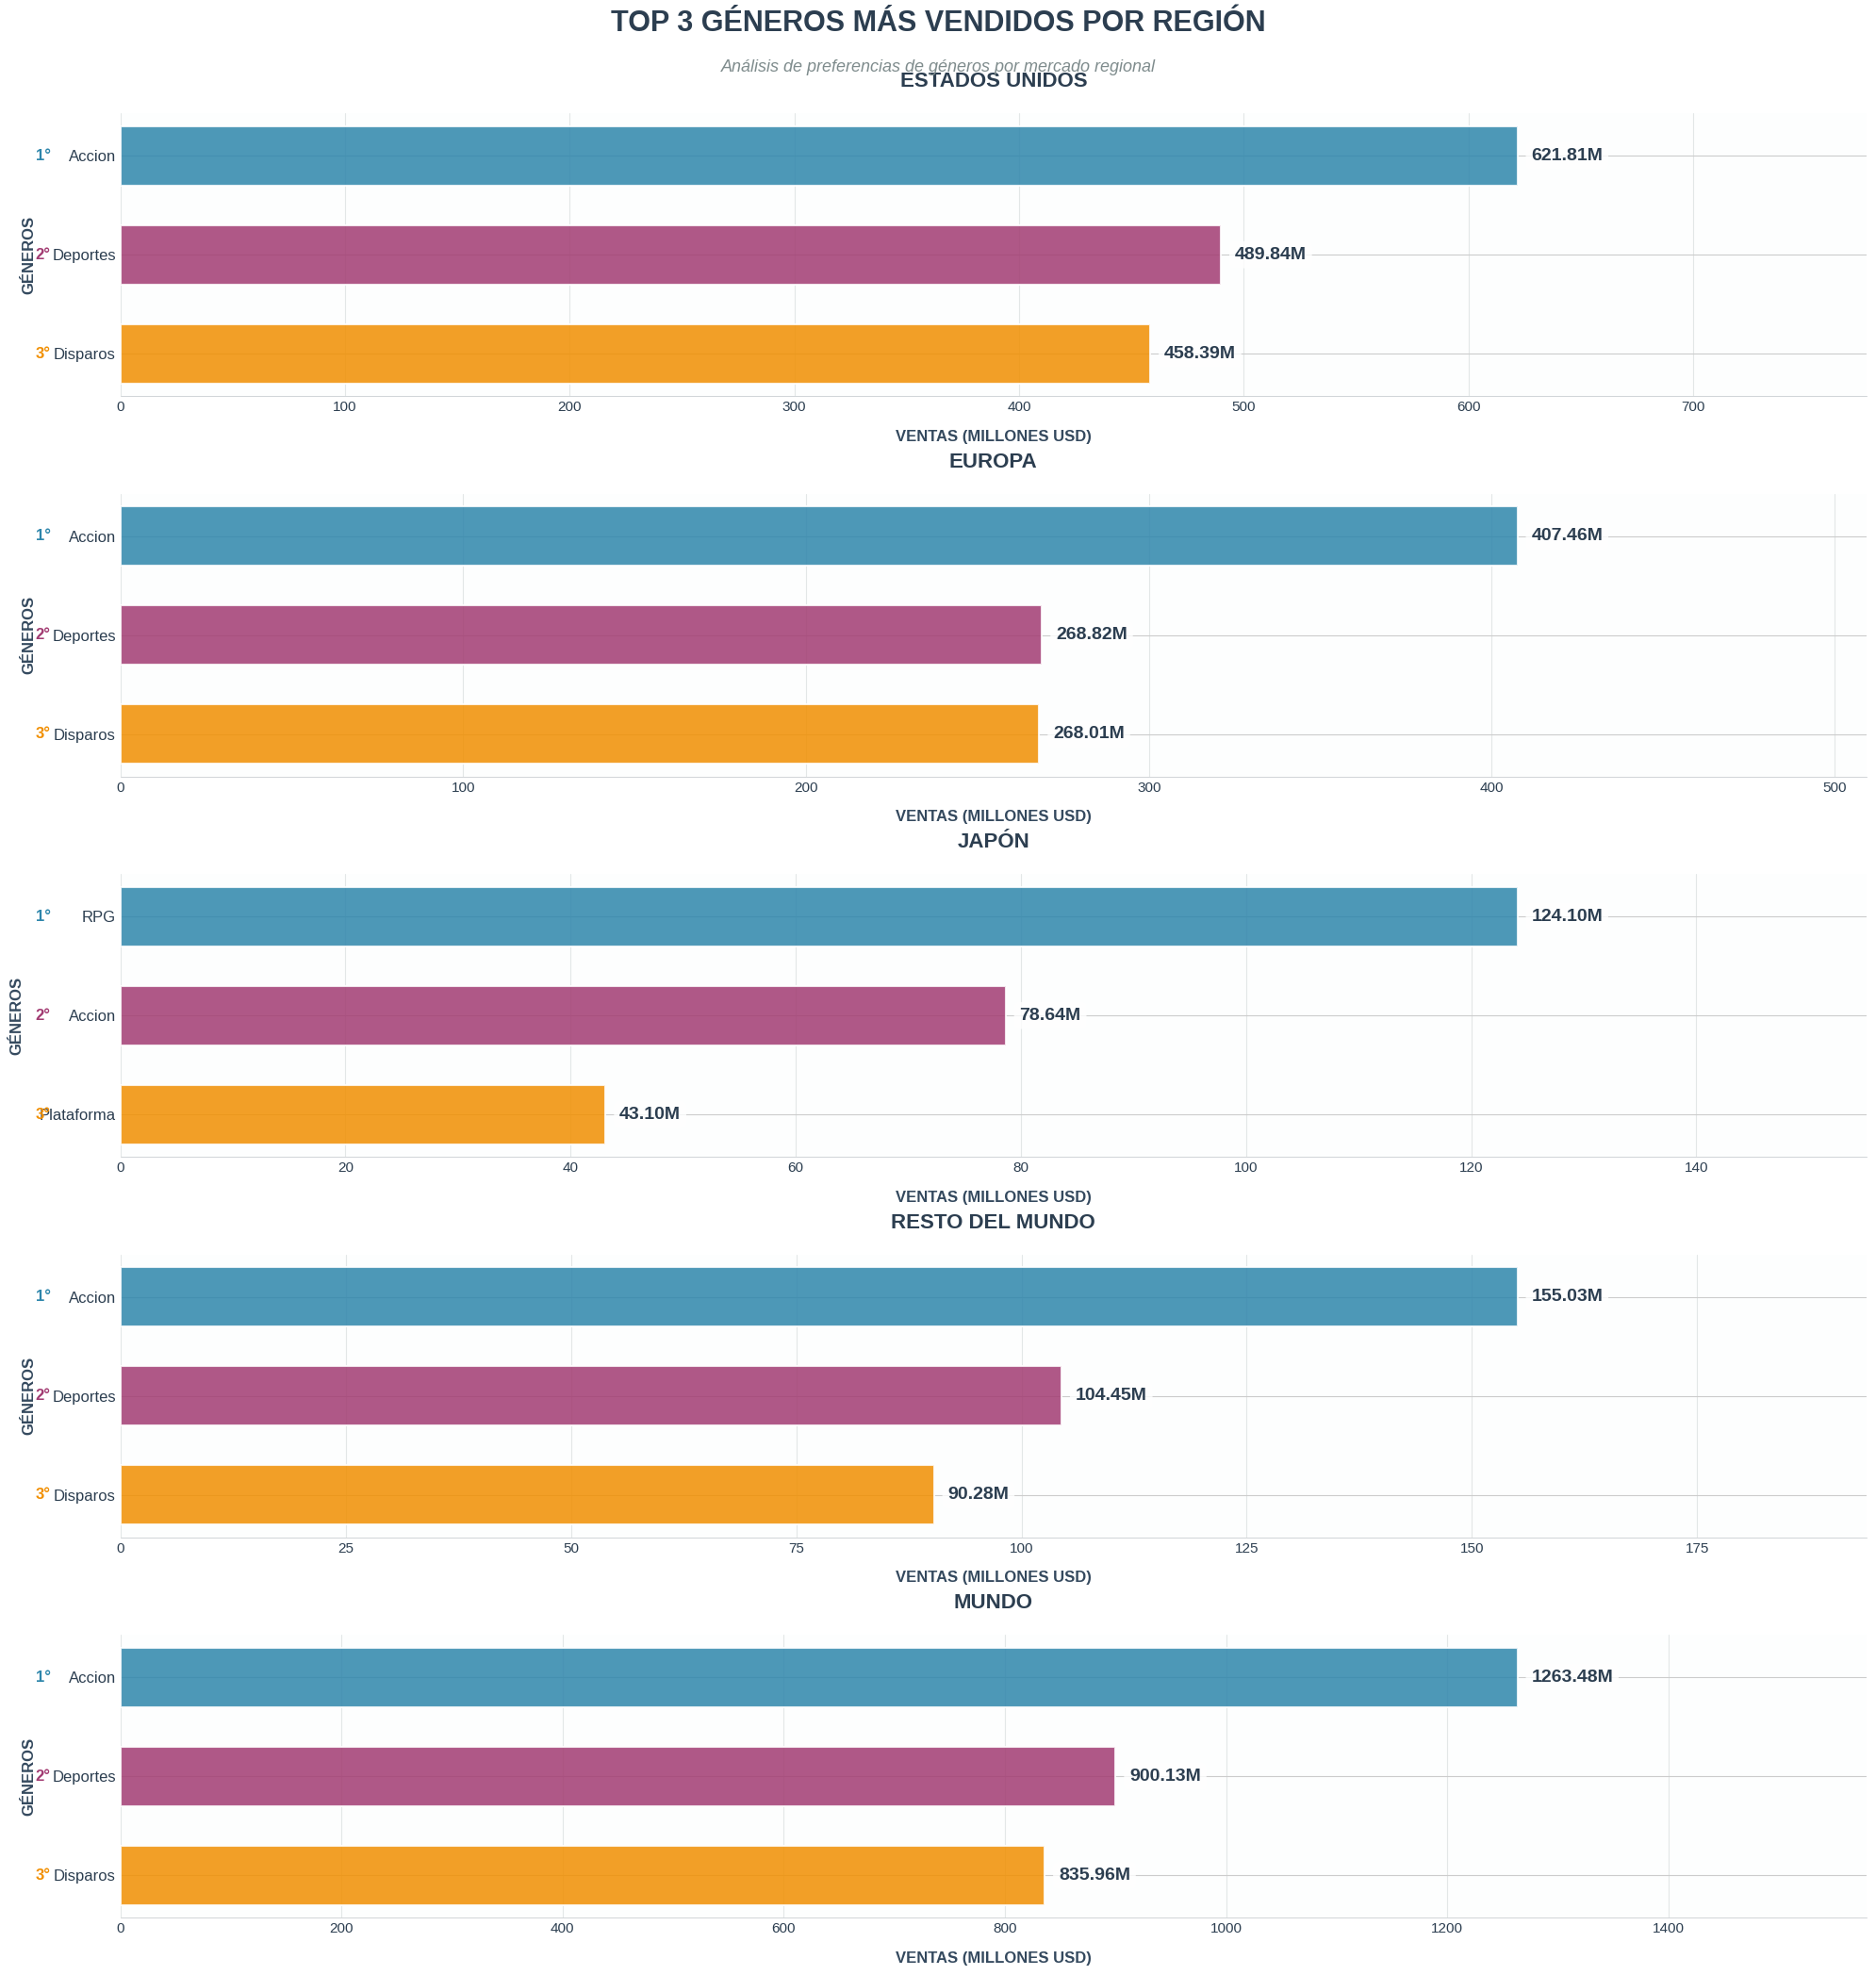


RESUMEN COMPARATIVO: TOP GENEROS POR REGION

REGION             1° LUGAR               2° LUGAR               3° LUGAR              
-------------------------------------------------------------------------------------
ESTADOS UNIDOS     Accion             (621.81M) Deportes           (489.84M) Disparos           (458.39M)
EUROPA             Accion             (407.46M) Deportes           (268.82M) Disparos           (268.01M)
JAPÓN              RPG                (124.10M) Accion             (78.64M) Plataforma         (43.10M)
RESTO DEL MUNDO    Accion             (155.03M) Deportes           (104.45M) Disparos           (90.28M)
MUNDO              Accion             (1263.48M) Deportes           (900.13M) Disparos           (835.96M)
-------------------------------------------------------------------------------------

ANALISIS DE TENDENCIAS REGIONALES
-----------------------------------------------------------------
> ESTADOS UNIDOS  : Accion             (621.81M - 22.1% del total

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(20, 22))

region = ['Ventas USA','Ventas Europa','Ventas Japon','Ventas resto del Mundo','Ventas Totales']
region_names = ['ESTADOS UNIDOS', 'EUROPA', 'JAPÓN', 'RESTO DEL MUNDO', 'MUNDO']

# Paleta de colores sofisticada
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E8914']

for i, ax in enumerate(axes):
    # Obtener top 3 GÉNEROS (no juegos) por región
    top_data = df.loc[df[region[i]].notna()].groupby('Genero')[region[i]].sum().sort_values(ascending=False).head(3)
    top_generos = top_data.index
    ventas = top_data.values

    # Crear gráfico de barras horizontal con estilo mejorado
    bars = ax.barh(top_generos, ventas, color=colors[:len(top_generos)], alpha=0.85,
                   edgecolor='white', linewidth=1.5, height=0.6)

    # Añadir valores y posiciones - USANDO CARACTERES BÁSICOS
    for j, (bar, venta) in enumerate(zip(bars, ventas)):
        width = bar.get_width()

        # Valor de ventas (posición principal)
        ax.text(width + max(ventas)*0.01, bar.get_y() + bar.get_height()/2.,
                f'{venta:.2f}M', ha='left', va='center',
                fontweight='bold', fontsize=14, color='#2C3E50',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='none'))

        # Posición (1°, 2°, 3°) - USANDO CARACTERES BÁSICOS COMPATIBLES
        posiciones = ['1°', '2°', '3°']  # Solo números básicos con símbolo de grado
        ax.text(-max(ventas)*0.05, bar.get_y() + bar.get_height()/2.,
                posiciones[j], ha='right', va='center',
                fontweight='bold', fontsize=12, color=colors[j])

    # Título con estilo mejorado
    ax.set_title(region_names[i], fontsize=16, fontweight='bold', pad=20,
                color='#2C3E50')

    # Etiquetas de ejes
    ax.set_xlabel('VENTAS (MILLONES USD)', fontsize=12, fontweight='bold',
                 color='#34495E', labelpad=12)
    ax.set_ylabel('GÉNEROS', fontsize=12, fontweight='bold',
                 color='#34495E', labelpad=12)

    # Mejorar ticks
    ax.tick_params(axis='y', labelsize=12, colors='#2C3E50')
    ax.tick_params(axis='x', labelsize=11, colors='#2C3E50')

    # Ordenar de mayor a menor
    ax.invert_yaxis()

    # Cuadrícula sutil
    ax.grid(True, alpha=0.2, linestyle='-', axis='x', color='#7F8C8D')

    # Ajustar límites para dar espacio a los textos
    ax.set_xlim(0, max(ventas) * 1.25)

    # Fondo elegante
    ax.set_facecolor('#FDFEFE')

    # Remover bordes y añadir línea sutil en la parte inferior
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('#BDC3C7')
    ax.spines['bottom'].set_linewidth(0.5)

# Título principal
plt.suptitle('TOP 3 GÉNEROS MÁS VENDIDOS POR REGIÓN',
             fontsize=22, fontweight='bold', y=0.95, color='#2C3E50')

# Subtítulo informativo
plt.figtext(0.5, 0.92, 'Análisis de preferencias de géneros por mercado regional',
            ha='center', fontsize=13, style='italic', color='#7F8C8D')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# TABLA RESUMEN COMPARATIVO (USANDO CARACTERES BÁSICOS)
print("\n" + "="*85)
print("RESUMEN COMPARATIVO: TOP GENEROS POR REGION")
print("="*85)

# Encabezado de la tabla
print(f"\n{'REGION':<18} {'1° LUGAR':<22} {'2° LUGAR':<22} {'3° LUGAR':<22}")
print("-" * 85)

for i, region_col in enumerate(region):
    # Obtener top 3 géneros para esta región
    top_data = df.loc[df[region_col].notna()].groupby('Genero')[region_col].sum().sort_values(ascending=False).head(3)
    top_generos = top_data.index
    ventas = top_data.values

    print(f"{region_names[i]:<18}", end="")

    for j, (genero, venta) in enumerate(zip(top_generos, ventas)):
        if j < 3:  # Solo mostrar hasta 3 géneros
            print(f" {genero:<18} ({venta:5.2f}M)", end="")

    print()

print("-" * 85)

# ANÁLISIS DE TENDENCIAS
print(f"\nANALISIS DE TENDENCIAS REGIONALES")
print("-" * 65)

# Encontrar el género más popular globalmente en cada región
for i, region_col in enumerate(region):
    top_genero = df.loc[df[region_col].notna()].groupby('Genero')[region_col].sum().nlargest(1)
    genero_lider = top_genero.index[0]
    ventas_lider = top_genero.values[0]

    # Calcular porcentaje del total de la región
    total_region = df[region_col].sum()
    porcentaje = (ventas_lider / total_region) * 100

    print(f"> {region_names[i]:<16}: {genero_lider:<18} ({ventas_lider:6.2f}M - {porcentaje:4.1f}% del total)")

print("-" * 65)

# GENEROS MAS CONSISTENTES ENTRE REGIONES
print(f"\nGENEROS MAS CONSISTENTES EN TODAS LAS REGIONES")
print("-" * 50)

# Contar en cuántas regiones aparece cada género en el top 3
apariciones_generos = {}

for region_col in region:
    top_data = df.loc[df[region_col].notna()].groupby('Genero')[region_col].sum().sort_values(ascending=False).head(3)
    for genero in top_data.index:
        if genero in apariciones_generos:
            apariciones_generos[genero] += 1
        else:
            apariciones_generos[genero] = 1

# Mostrar géneros más consistentes
for genero, count in sorted(apariciones_generos.items(), key=lambda x: x[1], reverse=True):
    if count >= 3:  # Géneros que aparecen en al menos 3 regiones
        print(f"   {genero:<22} -> Presente en {count}/5 regiones")

print("=" * 85)

#LAS CONSOLAS MAS VENDIDAS

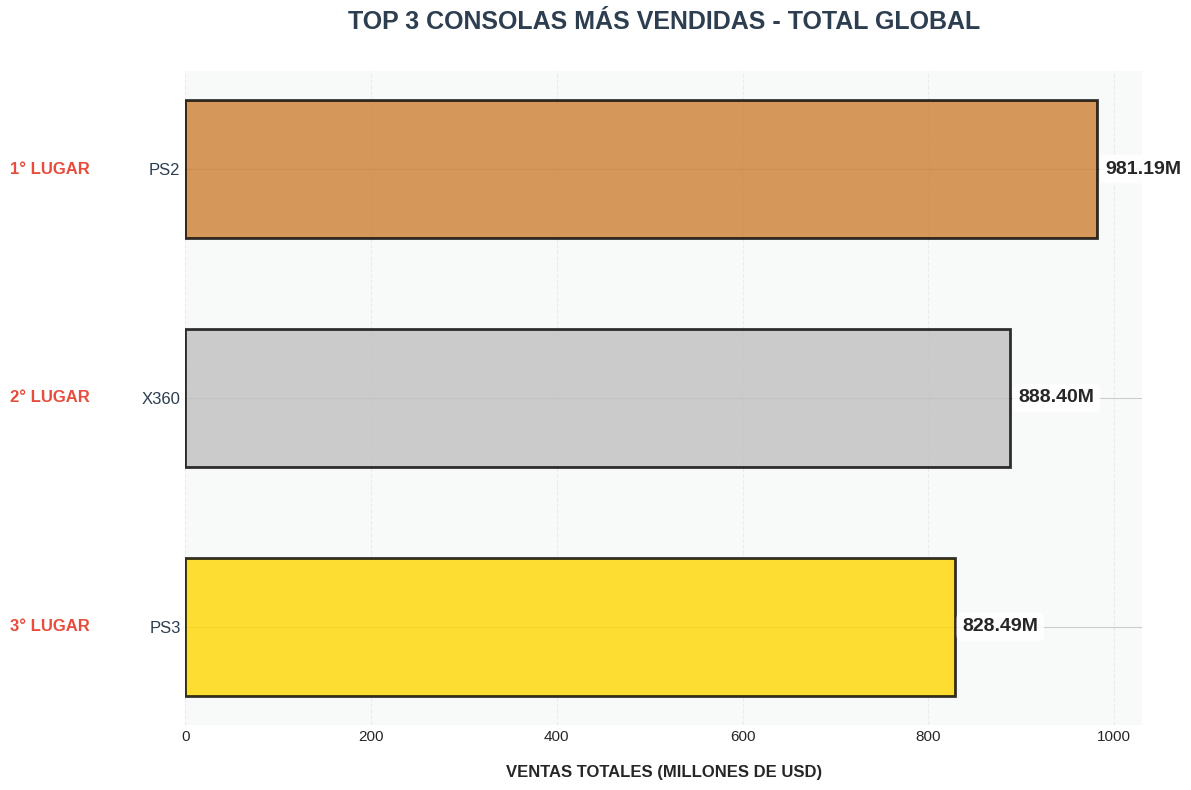

In [8]:
# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Top 3 consolas más vendidas a nivel general (orden descendente para el gráfico)
top_consolas = df.groupby('Consola')['Ventas Totales'].sum().nlargest(3).sort_values(ascending=True)

# Paleta de colores para los puestos
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Oro, Plata, Bronce

# Gráfico de barras horizontal
bars = ax.barh(top_consolas.index, top_consolas.values,
               color=colors,
               edgecolor='black',
               linewidth=2,
               alpha=0.8,
               height=0.6)

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + (width * 0.01),
            bar.get_y() + bar.get_height()/2,
            f'{width:.2f}M',
            ha='left',
            va='center',
            fontsize=14,
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='none'))

# Añadir medallas/posiciones CORREGIDAS - barra superior es 1°
posiciones = ['3° LUGAR', '2° LUGAR', '1° LUGAR']  # Orden invertido para coincidir con gráfico
for i, (consola, valor) in enumerate(top_consolas.items()):
    ax.text(-0.1, i, posiciones[i],
            ha='right', va='center',
            fontsize=12, fontweight='bold',
            color='#E74C3C',
            transform=ax.get_yaxis_transform())

# Título y etiquetas
ax.set_title('TOP 3 CONSOLAS MÁS VENDIDAS - TOTAL GLOBAL',
             fontsize=18, fontweight='bold', pad=30, color='#2C3E50')

ax.set_xlabel('VENTAS TOTALES (MILLONES DE USD)', fontsize=12, fontweight='bold', labelpad=15)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=12, labelcolor='#2C3E50')

# Grid y estilo
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

# Remover bordes
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


#LAS CONSOLAS MÁS VENDIDAS POR CADA GENERO DE JUEGO

/tmp/ipython-input-337125805.py:85: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


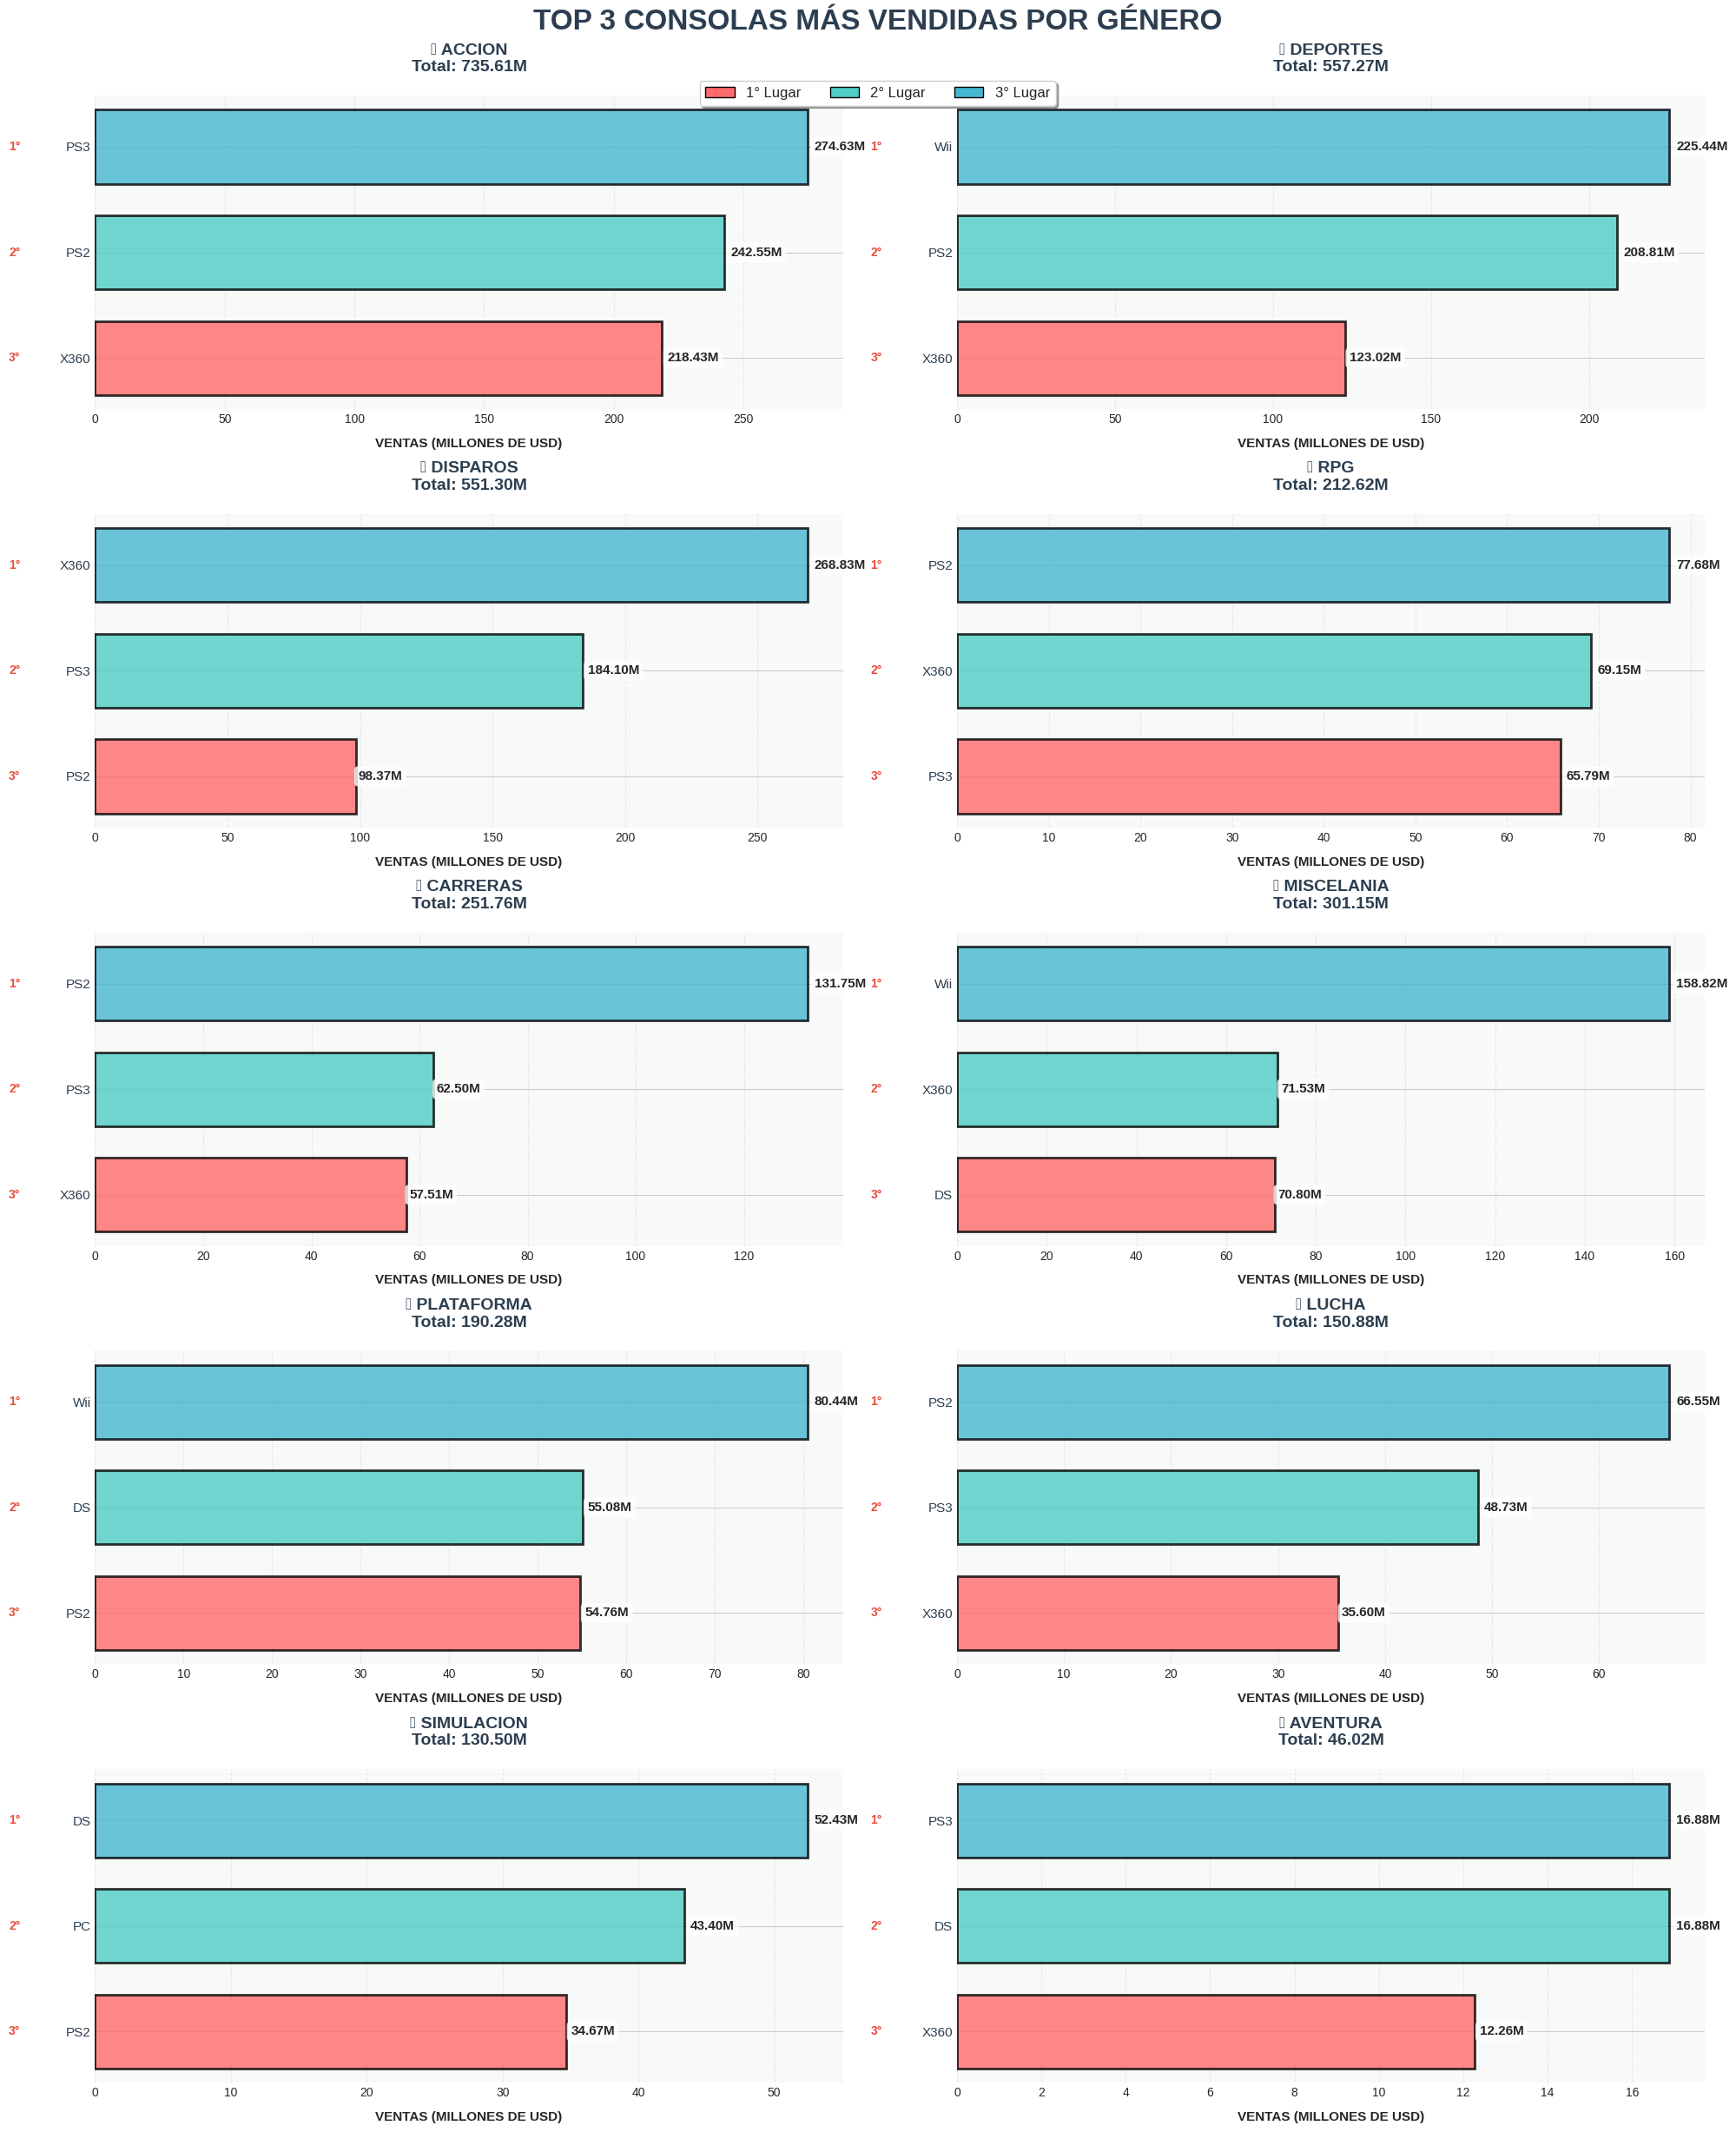

🎯 TOP 3 CONSOLAS MÁS VENDIDAS POR GÉNERO
GÉNERO               CONSOLA         VENTAS (M)   %        POS
-----------------------------------------------------------------

📊 ACCION           | Total:  735.61M
-----------------------------------------------------------------
   🥇 PS3                  274.63M   37.3%   1°
   🥈 PS2                  242.55M   33.0%   2°
   🥉 X360                 218.43M   29.7%   3°

📊 DEPORTES         | Total:  557.27M
-----------------------------------------------------------------
   🥇 Wii                  225.44M   40.5%   1°
   🥈 PS2                  208.81M   37.5%   2°
   🥉 X360                 123.02M   22.1%   3°

📊 DISPAROS         | Total:  551.30M
-----------------------------------------------------------------
   🥇 X360                 268.83M   48.8%   1°
   🥈 PS3                  184.10M   33.4%   2°
   🥉 PS2                   98.37M   17.8%   3°

📊 RPG              | Total:  212.62M
---------------------------------------------------------

In [ ]:
# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Paleta de colores distintiva
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

top_genero = df.loc[df['Ventas Totales'].notna()].groupby('Genero')['Ventas Totales'].sum().sort_values(ascending=False).head(10).index

for i, genero in enumerate(top_genero):
    ax = axes[i]
    # Obtener top 3 consolas por género
    genero_ventas_consola = df[df['Genero'] == genero].groupby('Consola')['Ventas Totales'].sum().nlargest(3).sort_values(ascending=True)  # Ascendente para barh

    # Gráfico de barras horizontal mejorado
    bars = ax.barh(genero_ventas_consola.index, genero_ventas_consola.values,
                   color=colors,
                   edgecolor='black',
                   linewidth=2,
                   alpha=0.8,
                   height=0.7)

    # Añadir valores en las barras con mejor formato
    for bar in bars:
        width = bar.get_width()
        ax.text(width + (width * 0.01),
                bar.get_y() + bar.get_height()/2,
                f'{width:.2f}M',
                ha='left',
                va='center',
                fontsize=11,
                fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='none'))

    # Añadir etiquetas de posición CORREGIDAS - ahora en orden inverso
    posiciones = ['1°', '2°', '3°']
    for j in range(len(genero_ventas_consola)):
        ax.text(-0.1, j, posiciones[2-j],  # Orden inverso: [2,1,0] -> ['1°','2°','3°']
                ha='right', va='center',
                fontsize=10, fontweight='bold',
                color='#E74C3C',
                transform=ax.get_yaxis_transform())

    # Mejorar el título
    ax.set_title(f'🎮 {genero.upper()}\nTotal: {genero_ventas_consola.sum():.2f}M',
                 fontsize=14, fontweight='bold', pad=20, color='#2C3E50')

    # Mejorar ejes y grid
    ax.set_xlabel('VENTAS (MILLONES DE USD)', fontsize=11, fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=11, labelcolor='#2C3E50')
    ax.grid(axis='x', alpha=0.4, linestyle='--', linewidth=0.8)
    ax.set_axisbelow(True)

    # Añadir fondo sutil
    ax.set_facecolor('#F8F9F9')

    # Remover bordes del gráfico
    for spine in ax.spines.values():
        spine.set_visible(False)

# Ocultar subplots no usados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título principal mejorado
plt.suptitle('TOP 3 CONSOLAS MÁS VENDIDAS POR GÉNERO',
             fontsize=24, y=0.98, fontweight='bold', color='#2C3E50')

# Añadir leyenda general
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[0], edgecolor='black', label='1° Lugar'),
                   plt.Rectangle((0,0),1,1, facecolor=colors[1], edgecolor='black', label='2° Lugar'),
                   plt.Rectangle((0,0),1,1, facecolor=colors[2], edgecolor='black', label='3° Lugar')]

fig.legend(handles=legend_elements,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.95),
           ncol=3,
           fontsize=12,
           frameon=True,
           fancybox=True,
           shadow=True)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Tabla resumen mejorada
print("🎯 TOP 3 CONSOLAS MÁS VENDIDAS POR GÉNERO")
print("=" * 65)
print(f"{'GÉNERO':<20} {'CONSOLA':<15} {'VENTAS (M)':<12} {'%':<8} {'POS'}")
print("-" * 65)

for genero in top_genero:
    top_consolas = df[df['Genero'] == genero].groupby('Consola')['Ventas Totales'].sum().nlargest(3)
    ventas_totales_genero = top_consolas.sum()

    # Encabezado del género
    print(f"\n📊 {genero.upper():<16} | Total: {ventas_totales_genero:>7.2f}M")
    print("-" * 65)

    # Mostrar en orden correcto (1° lugar primero)
    for pos, (consola, ventas) in enumerate(top_consolas.items(), 1):
        porcentaje = (ventas / ventas_totales_genero) * 100
        pos_icon = ['🥇', '🥈', '🥉'][pos-1]
        print(f"   {pos_icon} {consola:<18} {ventas:>8.2f}M {porcentaje:>6.1f}%   {pos}°")

In [ ]:
## EL AÑO EN QUE SE VENDIO MAS JUEGOS POR CONSOLA

pcva = df.groupby('Consola')['Año de lanzamiento'].mean()
pcva_redondeo = round(pcva)
##print(f"\n\n{'Año que se vendio mas juegos por consola'}\n\n",pcva_redondeo)

##TOTAL DE JUEGOS VENDIDOS POR CONSOLA

cma = df.groupby('Consola')['Ventas Totales'].sum()
cma = cma.sort_values(ascending=False)
cma_redondeo = round(cma)
##print(f"\n\n{'Suma total de los juegos vendidos por consola'}\n\n",cma_redondeo,f"\n\n{'**El punto marca el millon*'}*")


#LOS JUEGOS CON MAYOR PUNTUACION PROMEDIO (Puntaje de Criticos + Usuarios)

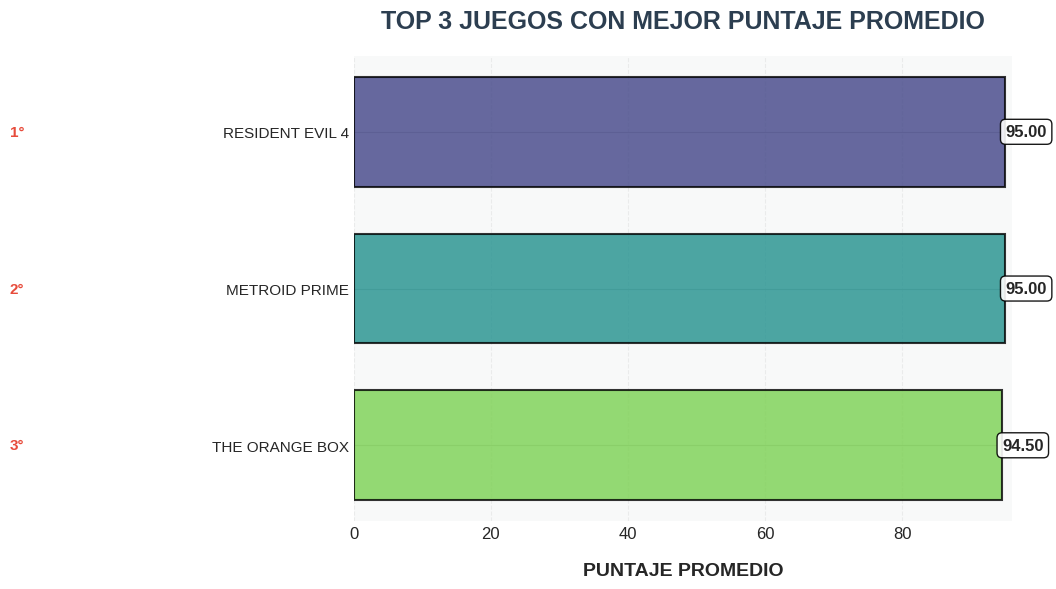

🎮 TOP 3 JUEGOS CON MEJOR PUNTAJE PROMEDIO
POS  JUEGO                     PUNTAJE    GÉNERO               DESARROLLADOR   CONSOLA   
-------------------------------------------------------------------------------------
 1° RESIDENT EVIL 4           95.00      Accion               Capcom          PS2       
 2° METROID PRIME             95.00      Disparos             Retro Studios   GC        
 3° THE ORANGE BOX            94.50      Disparos             Valve Software  X360      
-------------------------------------------------------------------------------------


In [32]:
# Obtener top 3 juegos con mejor puntaje promedio y ordenar para que el 1° quede arriba
top_3_juegos_puntaje = df.loc[df['promedio de puntaje'].notna() & (df['Juego'].notna())].groupby('Juego')['promedio de puntaje'].max().nlargest(3).sort_values(ascending=True)

# Configuración del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

# Crear gráfico de barras horizontales
colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(top_3_juegos_puntaje)))
bars = ax.barh(top_3_juegos_puntaje.index, top_3_juegos_puntaje.values,
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8, height=0.7)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', ha='left', va='center',
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='black'))

# Añadir etiquetas de posición CORREGIDAS - 1° en la barra superior
posiciones = ['1°', '2°', '3°']
for i in range(len(top_3_juegos_puntaje)):
    ax.text(-0.5, i, posiciones[2-i], ha='right', va='center',  # Orden inverso
            fontsize=11, fontweight='bold', color='#E74C3C',
            transform=ax.get_yaxis_transform())

# Personalizar el gráfico
ax.set_xlabel('PUNTAJE PROMEDIO', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlim(0, top_3_juegos_puntaje.max() + 1)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_facecolor('#F8F9F9')

# Remover bordes
for spine in ax.spines.values():
    spine.set_visible(False)

# Título del gráfico
plt.title('TOP 3 JUEGOS CON MEJOR PUNTAJE PROMEDIO',
          fontsize=18, fontweight='bold', pad=20, color='#2C3E50')

plt.tight_layout()
plt.show()

# Tabla informativa - CORREGIDA para mostrar 1° primero
print("🎮 TOP 3 JUEGOS CON MEJOR PUNTAJE PROMEDIO")
print("=" * 85)
print(f"{'POS':<4} {'JUEGO':<25} {'PUNTAJE':<10} {'GÉNERO':<20} {'DESARROLLADOR':<15} {'CONSOLA':<10}")
print("-" * 85)

# Mostrar en orden correcto (1° primero)
top_3_ordenado = top_3_juegos_puntaje.iloc[::-1]  # Invertir el orden para la tabla

for i, (juego, puntaje) in enumerate(top_3_ordenado.items(), 1):
    # Obtener el desarrollador, consola y género del juego
    juego_data = df[df['Juego'] == juego].iloc[0]
    desarrollador = juego_data['Desarrollador'] if pd.notna(juego_data['Desarrollador']) else "N/A"
    consola = juego_data['Consola'] if pd.notna(juego_data['Consola']) else "N/A"
    genero = juego_data['Genero'] if pd.notna(juego_data['Genero']) else "N/A"

    print(f"{i:>2}° {juego:<25} {puntaje:<10.2f} {genero:<20} {desarrollador:<15} {consola:<10}")

print("-" * 85)

#LOS JUEGOS MAS VENDIDOS POR REGION CON SU RESPECTIVO GENERO

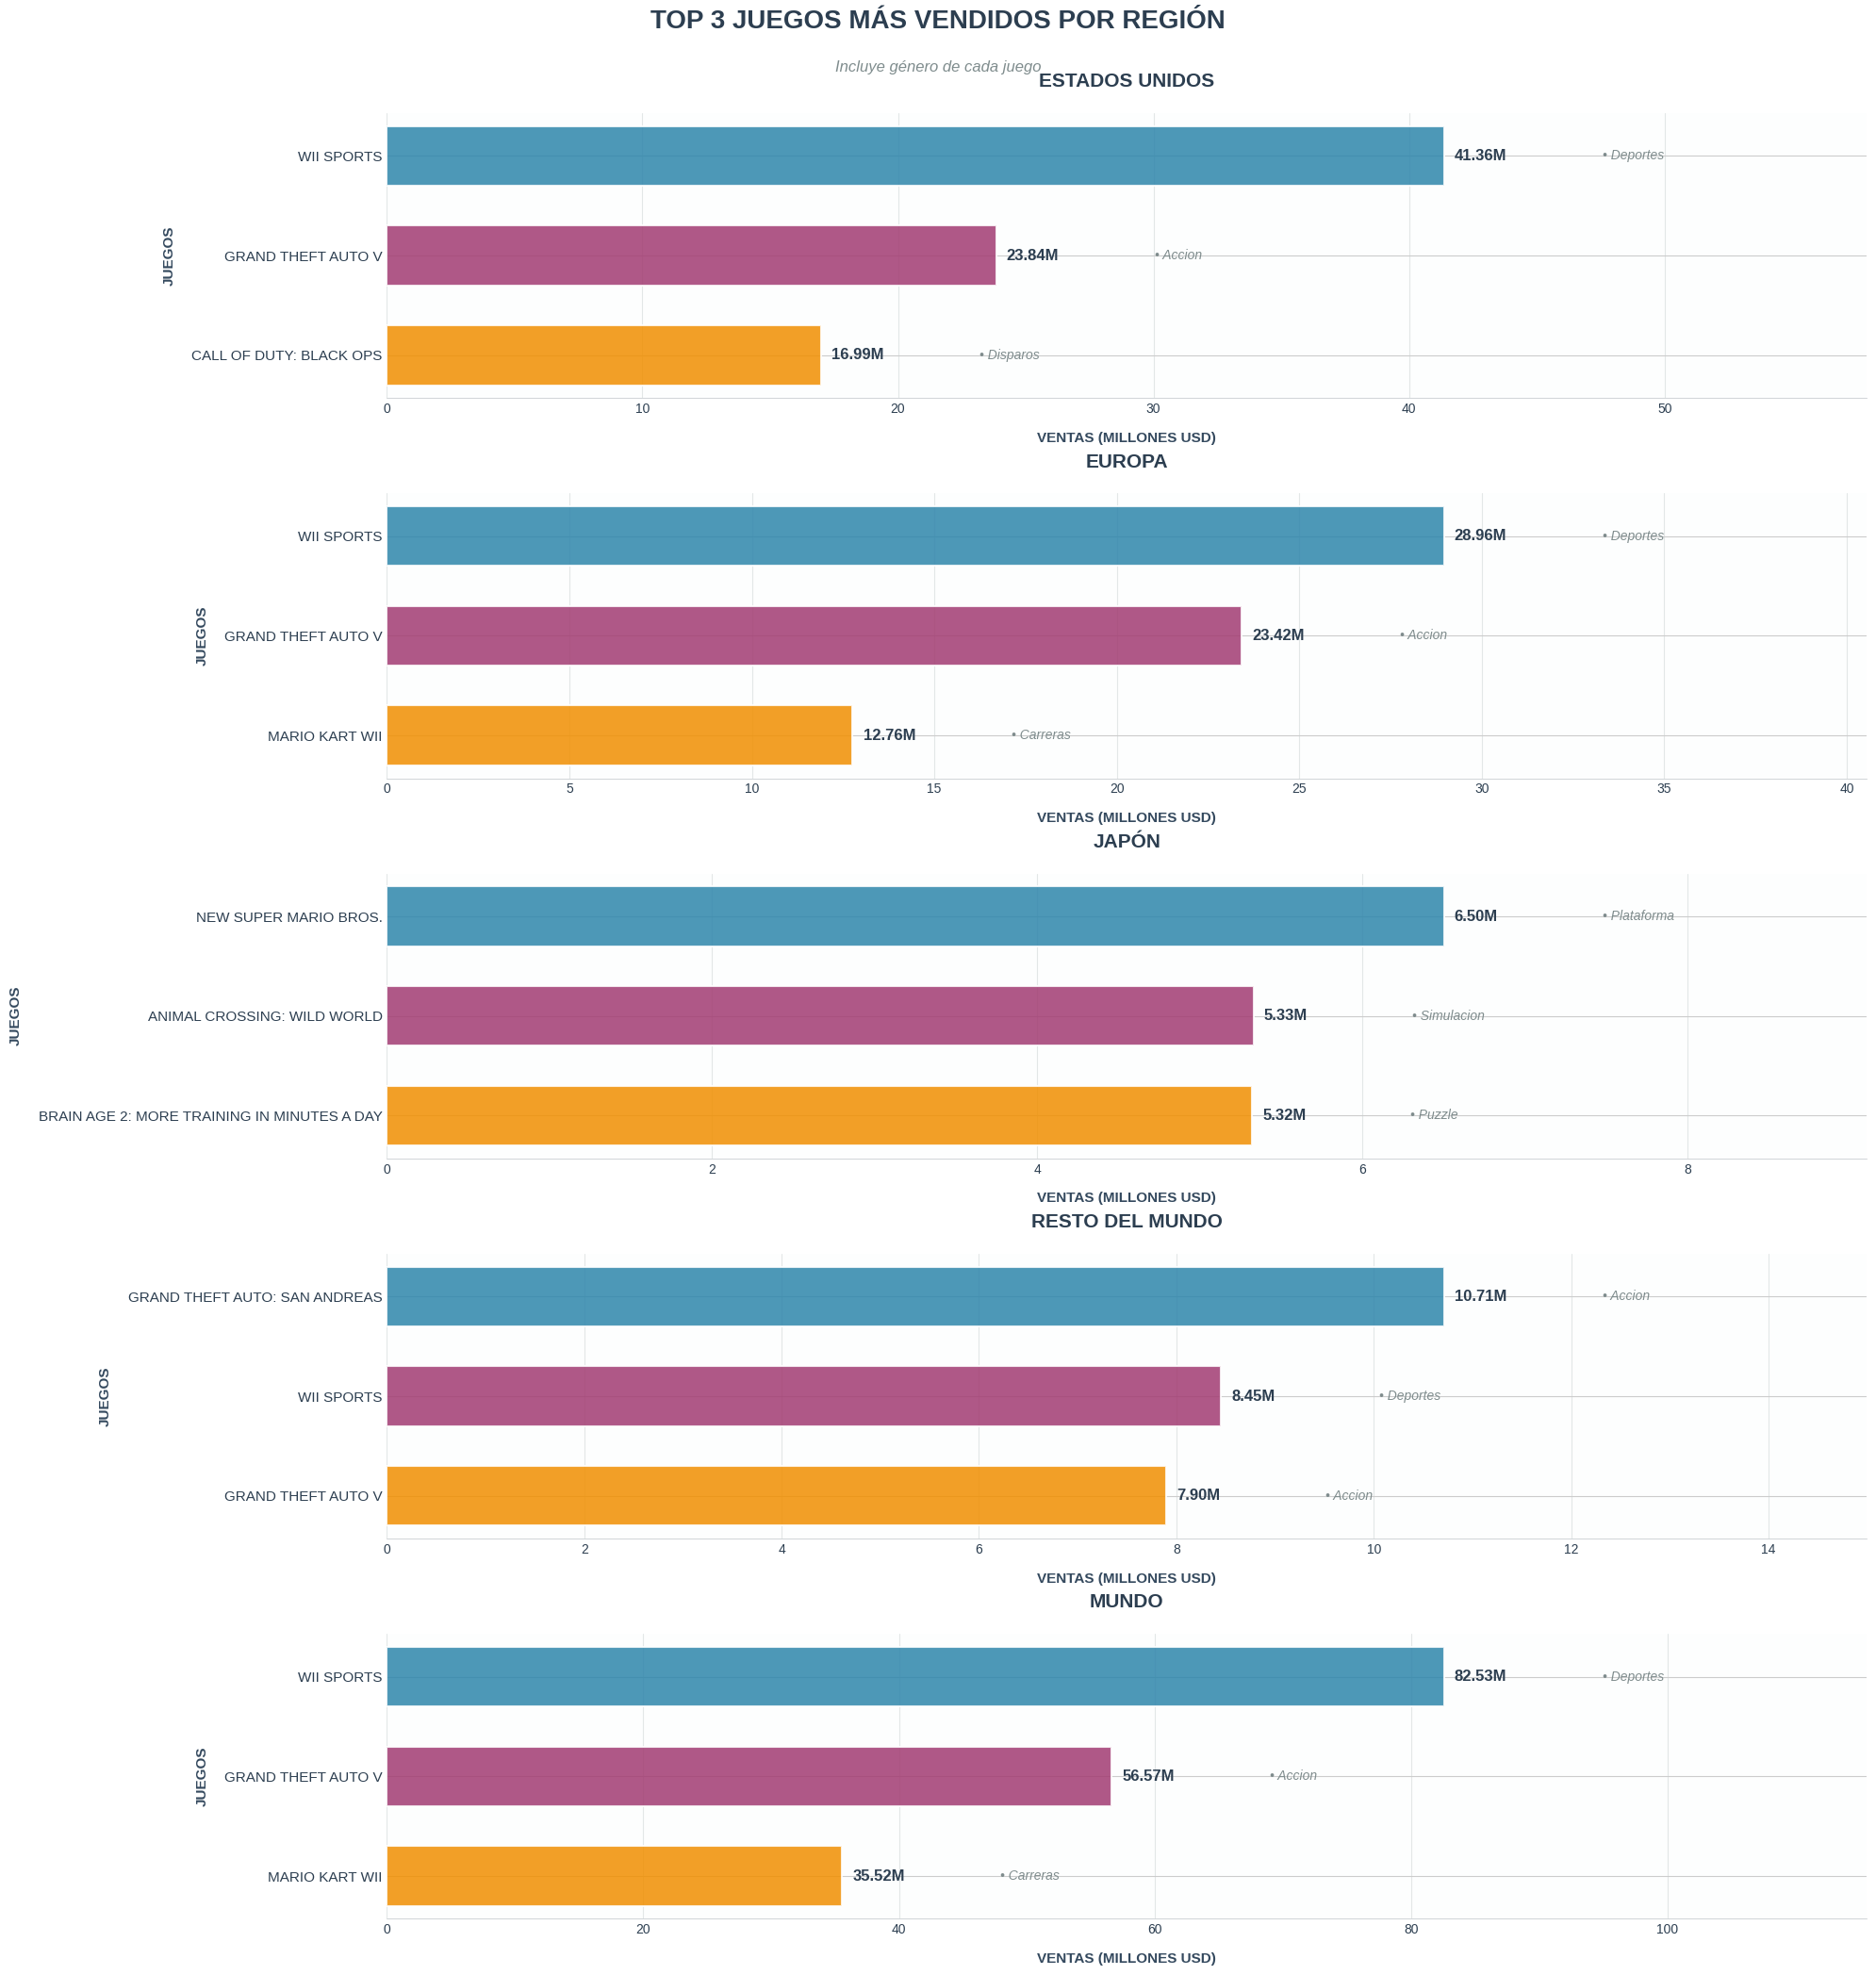

In [15]:
fig, axes = plt.subplots(5, 1, figsize=(20, 22))

region = ['Ventas USA','Ventas Europa','Ventas Japon','Ventas resto del Mundo','Ventas Totales']
region_names = ['ESTADOS UNIDOS', 'EUROPA', 'JAPÓN', 'RESTO DEL MUNDO', 'MUNDO']

# Paleta de colores sofisticada
colors = ['#2E86AB', '#A23B72', '#F18F01']

for i, ax in enumerate(axes):
    # Obtener top 3 juegos con su género
    top_data = df.loc[df[region[i]].notna()].groupby(['Juego', 'Genero'])[region[i]].sum().sort_values(ascending=False).head(3)
    top_genero = top_data.index.get_level_values('Juego')
    generos = top_data.index.get_level_values('Genero')
    venta = top_data.values

    # Crear gráfico de barras horizontal con estilo mejorado
    bars = ax.barh(top_genero, venta, color=colors, alpha=0.85,
                   edgecolor='white', linewidth=1.5, height=0.6)

    # Añadir valores y género - CORREGIDO PARA EVITAR SUPERPOSICIÓN
    for bar, v, genero in zip(bars, venta, generos):
        width = bar.get_width()

        # Valor de ventas (posición principal)
        ax.text(width + max(venta)*0.01, bar.get_y() + bar.get_height()/2.,
                f'{v:.2f}M', ha='left', va='center',
                fontweight='bold', fontsize=12, color='#2C3E50')

        # Género (posición separada - A LA DERECHA DEL VALOR)
        ax.text(width + max(venta)*0.15, bar.get_y() + bar.get_height()/2.,
                f"• {genero}", ha='left', va='center',
                fontstyle='italic', fontsize=10, color='#7F8C8D')

    # Título con estilo mejorado
    ax.set_title(region_names[i], fontsize=15, fontweight='bold', pad=20,
                color='#2C3E50')

    # Etiquetas de ejes
    ax.set_xlabel('VENTAS (MILLONES USD)', fontsize=11, fontweight='bold',
                 color='#34495E', labelpad=12)
    ax.set_ylabel('JUEGOS', fontsize=11, fontweight='bold',
                 color='#34495E', labelpad=12)

    # Mejorar ticks
    ax.tick_params(axis='y', labelsize=11, colors='#2C3E50')
    ax.tick_params(axis='x', labelsize=10, colors='#2C3E50')

    # Ordenar de mayor a menor
    ax.invert_yaxis()

    # Cuadrícula sutil
    ax.grid(True, alpha=0.2, linestyle='-', axis='x', color='#7F8C8D')

    # Ajustar límites para dar espacio a los textos
    ax.set_xlim(0, max(venta) * 1.4)  # Más espacio para los textos

    # Fondo elegante
    ax.set_facecolor('#FDFEFE')

    # Remover bordes y añadir línea sutil en la parte inferior
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('#BDC3C7')
    ax.spines['bottom'].set_linewidth(0.5)

# Título principal
plt.suptitle('TOP 3 JUEGOS MÁS VENDIDOS POR REGIÓN',
             fontsize=20, fontweight='bold', y=0.95, color='#2C3E50')

# Subtítulo informativo
plt.figtext(0.5, 0.92, 'Incluye género de cada juego',
            ha='center', fontsize=12, style='italic', color='#7F8C8D')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# GRAFICO DE VENTAS POR REGION 2000-2014

In [ ]:

df_promedio_ventas_total = df[filtro_rango].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_total.sort_values(by='Ventas Totales',ascending=False).head()


,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2008-12-31,273.98,144.18,37.60,62.93,518.86
2009-12-31,244.89,146.96,34.41,56.03,482.33
2007-12-31,245.63,129.14,35.09,62.95,473.10
2010-12-31,219.61,134.20,25.37,46.14,425.49
2006-12-31,231.24,106.60,40.43,46.64,425.05


In [ ]:

df_promedio_ventas_1 = df[filtro_rango_1].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_1.sort_values(by='Ventas Totales',ascending=False).head()





,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2004-12-31,175.23,83.76,22.74,42.30,324.05
2002-12-31,166.03,86.35,18.65,22.83,294.02
2003-12-31,147.38,77.59,17.28,20.10,262.58
2001-12-31,139.60,73.87,23.57,18.35,255.26
2000-12-31,39.58,25.46,11.38,5.55,81.92


In [ ]:
df_promedio_ventas_2 = df[filtro_rango_2].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_2.sort_values(by='Ventas Totales',ascending=False).head()

,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2008-12-31,273.98,144.18,37.60,62.93,518.86
2009-12-31,244.89,146.96,34.41,56.03,482.33
2007-12-31,245.63,129.14,35.09,62.95,473.10
2006-12-31,231.24,106.60,40.43,46.64,425.05
2005-12-31,178.81,89.86,38.98,31.95,339.76


In [ ]:
df_promedio_ventas_3 = df[filtro_rango_3].set_index('Año de lanzamiento').resample('YE').agg({
    'Ventas USA': 'sum',
    'Ventas Europa': 'sum',
    'Ventas Japon': 'sum',
    'Ventas resto del Mundo': 'sum',
    'Ventas Totales': 'sum'
})

#df_promedio_ventas_anual = df[filtro_rango].set_index('Año de lanzamiento')['Ventas Totales'].resample('YE').sum()

df_promedio_ventas_3.sort_values(by='Ventas Totales',ascending=False).head()

,Ventas USA,Ventas Europa,Ventas Japon,Ventas resto del Mundo,Ventas Totales
Año de lanzamiento,,,,,
2010-12-31,219.61,134.20,25.37,46.14,425.49
2011-12-31,193.39,129.09,24.19,42.50,389.19
2012-12-31,138.49,102.28,27.75,32.52,301.02
2013-12-31,128.85,101.12,19.29,33.27,282.44
2014-12-31,103.23,97.82,15.67,29.11,245.79


In [ ]:
# Crear la figura
fig = go.Figure()

# Añadir las líneas de ventas
fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas USA'],
    name='Ventas USA',
    line=dict(color='red', width=2)
))

fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas Europa'],
    name='Ventas Europa',
    line=dict(color='blue', width=2)
))

fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas Japon'],
    name='Ventas Japon',
    line=dict(color='green', width=2)
))

fig.add_trace(go.Scatter(
    x=df_promedio_ventas_total.index,
    y=df_promedio_ventas_total['Ventas resto del Mundo'],
    name='Ventas resto del Mundo',
    line=dict(color='purple', width=2)
))

# Calcular promedios y máximos
promedio_ventas = df_promedio_ventas_total[['Ventas USA', 'Ventas Europa', 'Ventas Japon', 'Ventas resto del Mundo']].mean().mean()
max_ventas = df_promedio_ventas_total[['Ventas USA', 'Ventas Europa', 'Ventas Japon', 'Ventas resto del Mundo']].max().max()

# Añadir líneas horizontales para promedio y máximo
fig.add_hline(y=promedio_ventas,
              line_dash="dash",
              line_color="black",
              annotation_text=f'Promedio: {promedio_ventas:.2f}',
              annotation_position="right")

fig.add_hline(y=max_ventas,
              line_dash="dash",
              line_color="orange",
              annotation_text=f'Máximo: {max_ventas:.2f}',
              annotation_position="right")

# Configurar el layout
fig.update_layout(
    title={
        'text': 'VENTAS DE JUEGOS EN CADA REGION (2000-2014)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16, 'weight': 'bold'}
    },
    xaxis_title='Año',
    yaxis_title='Ventas en millones',
    xaxis=dict(tickangle=-45),
    yaxis=dict(range=[0, 300]),
    showlegend=True,
    width=1000,
    height=500,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Mostrar la figura
fig.show()

In [ ]:
# fig, ax = plt.subplots(5,1,figsize=(16,9))
# fig.suptitle('VENTAS POR REGION (2000-2004)',fontsize=16, fontweight='bold')

# max_ventas = df_promedio_ventas_1[['Ventas USA']].max().max()
# promedio_ventas = df_promedio_ventas_1[['Ventas USA']].mean().mean()

# ax[0].plot(df_promedio_ventas_1['Ventas USA'], label='Ventas', color ='red', linestyle = '-')
# ax[0].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=1)
# ax[0].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)


# ax[0].set_ylim(0,200)
# ax[0].grid(alpha=0.9)
# ax[0].legend()
# ax[0].set_title('Ventas USA',fontweight='bold')


# promedio_ventas = df_promedio_ventas_1[['Ventas Europa']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas Europa']].max().max()

# ax[1].plot(df_promedio_ventas_1['Ventas Europa'], label='Ventas', color ='orange', linestyle = '-')
# ax[1].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='black', linestyle='--', alpha=0.8)
# ax[1].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[1].set_ylabel('Ventas en millones', fontweight='bold')
# ax[1].set_ylim(0,100)
# ax[1].grid(alpha=0.9)
# ax[1].legend()
# ax[1].set_title('Ventas Europa',fontweight='bold')

# promedio_ventas = df_promedio_ventas_1[['Ventas Japon']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas Japon']].max().max()

# ax[2].plot(df_promedio_ventas_1['Ventas Japon'], label='Ventas', color ='green', linestyle = '-')
# ax[2].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[2].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[2].set_ylim(0,30)
# ax[2].grid(alpha=0.9)
# ax[2].legend()
# ax[2].set_title('Ventas Japon',fontweight='bold')

# promedio_ventas = df_promedio_ventas_1[['Ventas resto del Mundo']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas resto del Mundo']].max().max()

# ax[3].plot(df_promedio_ventas_1['Ventas resto del Mundo'], label='Ventas', color ='green', linestyle = '-')
# ax[3].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[3].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[3].set_ylim(0,50)
# ax[3].grid(alpha=0.9)
# ax[3].legend()
# ax[3].set_title('Ventas resto del Mundo',fontweight='bold')

# promedio_ventas = df_promedio_ventas_1[['Ventas Totales']].mean().mean()
# max_ventas = df_promedio_ventas_1[['Ventas Totales']].max().max()

# ax[4].plot(df_promedio_ventas_1['Ventas Totales'], label='Ventas', color ='green', linestyle = '-')
# ax[4].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[4].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[4].set_xlabel('Año', fontweight='bold')
# ax[4].set_ylim(0,500)
# ax[4].grid(alpha=0.9)
# ax[4].legend()
# ax[4].set_title('Ventas Totales',fontweight='bold')


# plt.subplots_adjust(hspace=0.4)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

# EVOLUCION DE VENTAS DE JUEGOS, DIVIDIDO EN 3 PERIODOS ENTRE 2000-2014

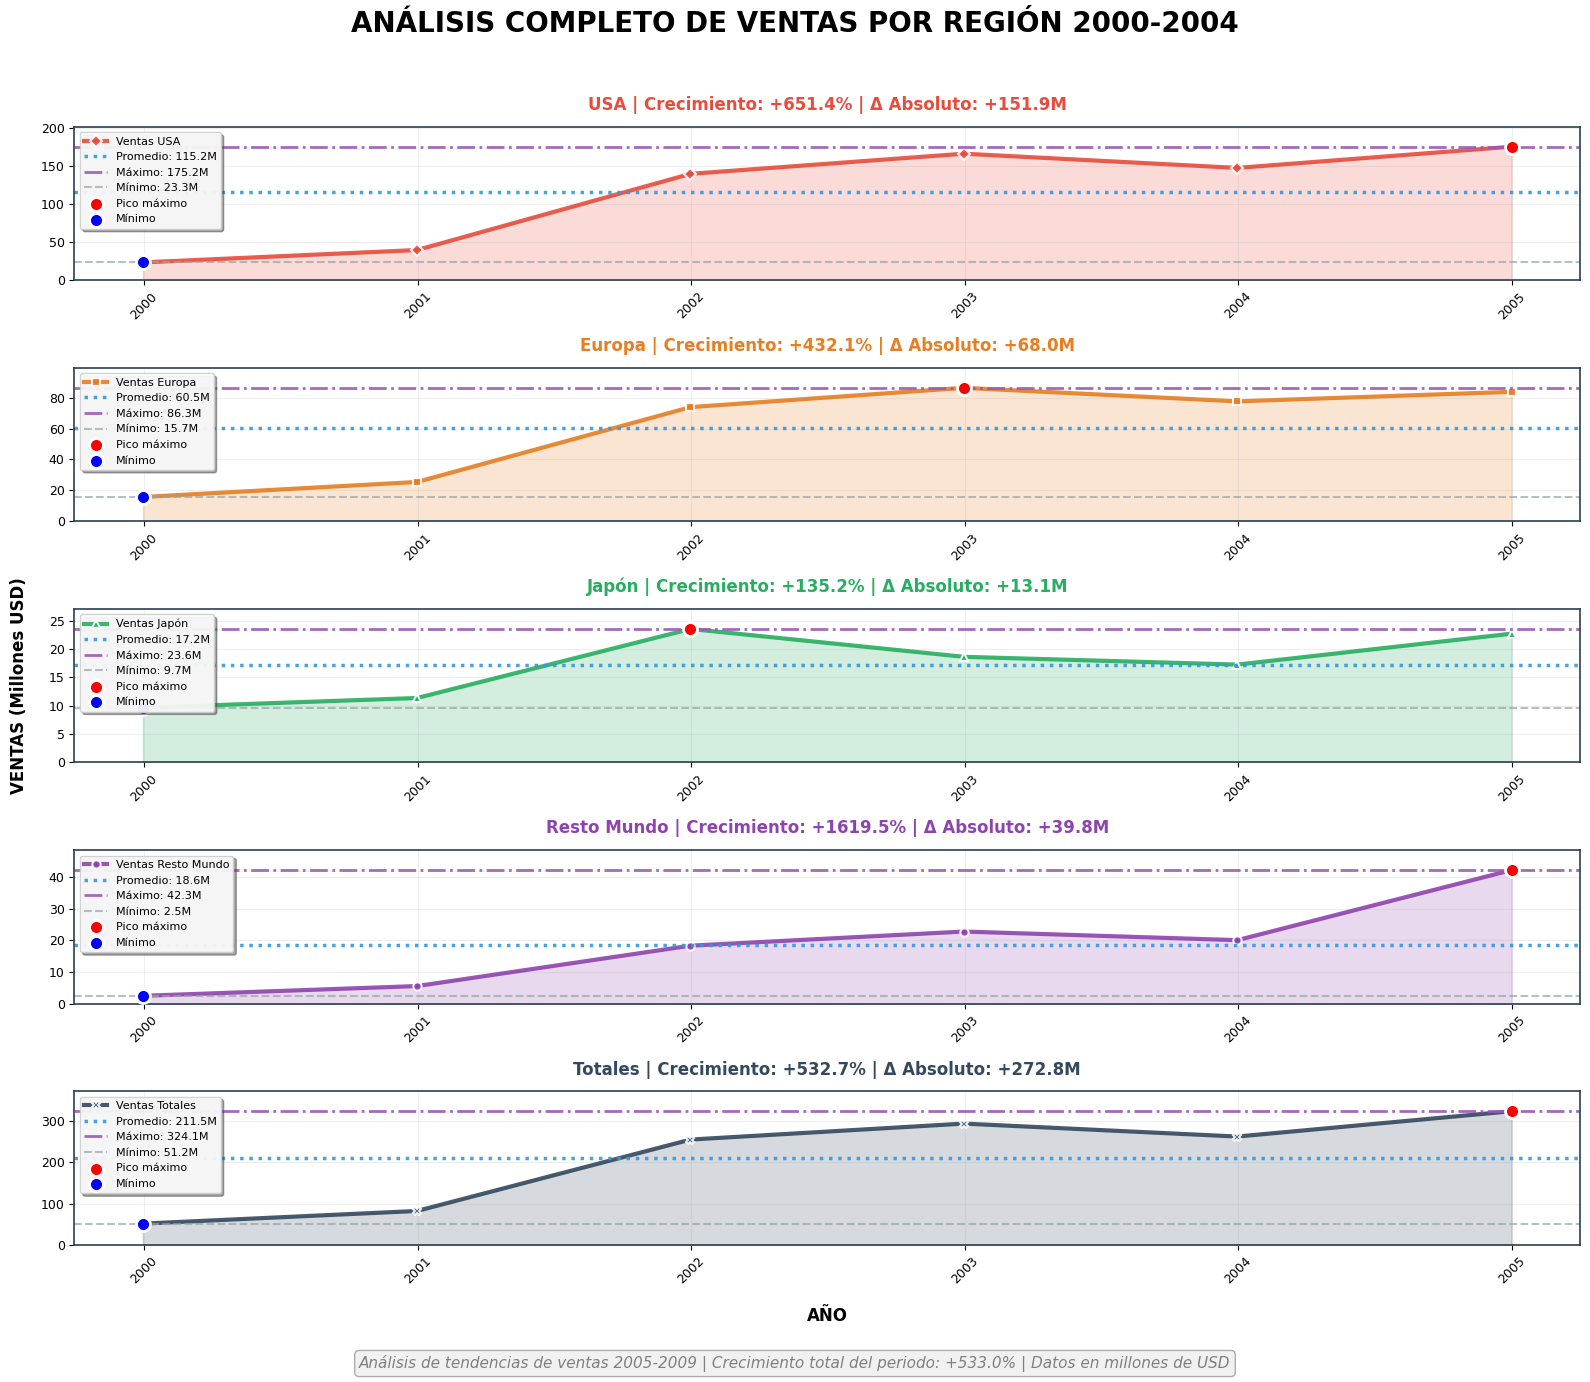

In [ ]:
# CONFIGURACIÓN PROFESIONAL MEJORADA - VERSIÓN DINÁMICA
fig, ax = plt.subplots(5, 1, figsize=(16, 14))

# Obtener años disponibles dinámicamente
años_disponibles = df_promedio_ventas_1.index.tolist()
año_inicio = años_disponibles[0]
año_fin = años_disponibles[-1]
periodo = f"{año_inicio}-{año_fin}"

fig.suptitle(f'ANÁLISIS COMPLETO DE VENTAS POR REGIÓN 2000-2004',
             fontsize=20, fontweight='bold', y=0.98)

# Configuración avanzada dinámica
configuraciones = {
    'USA': {'col': 'Ventas USA', 'color': '#E74C3C', 'marker': 'D'},
    'Europa': {'col': 'Ventas Europa', 'color': '#E67E22', 'marker': 's'},
    'Japón': {'col': 'Ventas Japon', 'color': '#27AE60', 'marker': '^'},
    'Resto Mundo': {'col': 'Ventas resto del Mundo', 'color': '#8E44AD', 'marker': 'o'},
    'Totales': {'col': 'Ventas Totales', 'color': '#34495E', 'marker': 'X'}
}

# Primero calcular límites Y dinámicamente
for region, config in configuraciones.items():
    if config['col'] in df_promedio_ventas_1.columns:
        data = df_promedio_ventas_1[config['col']]
        max_val = data.max()
        config['ylim'] = (0, max_val * 1.15)  # 15% de margen

for idx, (region, config) in enumerate(configuraciones.items()):
    try:
        if config['col'] not in df_promedio_ventas_1.columns:
            print(f"Advertencia: Columna {config['col']} no encontrada")
            continue

        data = df_promedio_ventas_1[config['col']]
        avg = data.mean()
        max_val = data.max()
        min_val = data.min()

        # Calcular métricas usando años disponibles
        valor_inicio = data.iloc[0]
        valor_fin = data.iloc[-1]
        crecimiento_absoluto = valor_fin - valor_inicio
        tasa_crecimiento = ((valor_fin - valor_inicio) / valor_inicio * 100) if valor_inicio != 0 else 0

        # Gráfico principal con marcadores diferenciados
        ax[idx].plot(data.index, data.values,
                     color=config['color'], linewidth=3, alpha=0.9,
                     marker=config['marker'], markersize=6,
                     markeredgecolor='white', markeredgewidth=1.5,
                     label=f'Ventas {region}')

        # Líneas de referencia mejoradas
        ax[idx].axhline(avg, color='#3498DB', linestyle=':', alpha=0.9, linewidth=2.5,
                       label=f'Promedio: {avg:.1f}M')
        ax[idx].axhline(max_val, color='#9B59B6', linestyle='-.', alpha=0.9, linewidth=2,
                       label=f'Máximo: {max_val:.1f}M')
        ax[idx].axhline(min_val, color='#95A5A6', linestyle='--', alpha=0.7, linewidth=1.5,
                       label=f'Mínimo: {min_val:.1f}M')

        # Rellenar área bajo la curva
        ax[idx].fill_between(data.index, data.values, alpha=0.2, color=config['color'])

        # Destacar puntos importantes
        ax[idx].scatter(data.idxmax(), max_val, color='red', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Pico máximo')
        ax[idx].scatter(data.idxmin(), min_val, color='blue', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Mínimo')

        # Configuración del subplot con más información
        color_crecimiento = '#27AE60' if tasa_crecimiento > 0 else '#E74C3C'
        ax[idx].set_title(f'{region} | Crecimiento: {tasa_crecimiento:+.1f}% | '
                         f'Δ Absoluto: {crecimiento_absoluto:+.1f}M',
                         fontsize=12, fontweight='bold', pad=12, color=config['color'])

        ax[idx].legend(loc='upper left', frameon=True, fancybox=True,
                      shadow=True, fontsize=8, framealpha=0.9)
        ax[idx].grid(True, alpha=0.2, linestyle='-')
        ax[idx].set_ylim(config['ylim'])

        # Mejorar etiquetas de ejes
        ax[idx].tick_params(axis='x', rotation=45, labelsize=9)
        ax[idx].tick_params(axis='y', labelsize=9)

        # Ejes
        if idx == 2:
            ax[idx].set_ylabel('VENTAS (Millones USD)', fontsize=12,
                              fontweight='bold', labelpad=15)
        if idx == 4:
            ax[idx].set_xlabel('AÑO', fontsize=12, fontweight='bold', labelpad=15)

        # Estética de spines mejorada
        for spine in ax[idx].spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('#2C3E50')

    except Exception as e:
        print(f"Error inesperado en {region}: {e}")
        continue

# Calcular métricas generales del periodo
columnas_ventas = [config['col'] for config in configuraciones.values()
                  if config['col'] in df_promedio_ventas_1.columns and config['col'] != 'Ventas Totales']

if columnas_ventas:
    try:
        total_inicio = sum(df_promedio_ventas_1[columnas_ventas].iloc[0])
        total_fin = sum(df_promedio_ventas_1[columnas_ventas].iloc[-1])
        crecimiento_total = ((total_fin - total_inicio) / total_inicio * 100)
    except:
        total_inicio = total_fin = crecimiento_total = 0
else:
    total_inicio = total_fin = crecimiento_total = 0

# Añadir anotación general mejorada
fig.text(0.5, 0.01,
         f'Análisis de tendencias de ventas 2005-2009 | '
         f'Crecimiento total del periodo: {crecimiento_total:+.1f}% | '
         f'Datos en millones de USD',
         ha='center', fontsize=11, style='italic', color='gray',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.3))

# Añadir cuadro resumen dinámico


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

In [ ]:
# fig, ax = plt.subplots(5,1,figsize=(16,9))
# fig.suptitle('VENTAS POR REGION (2005-2009)',fontsize=16, fontweight='bold')

# max_ventas = df_promedio_ventas_2[['Ventas USA']].max().max()
# promedio_ventas = df_promedio_ventas_2[['Ventas USA']].mean().mean()

# ax[0].plot(df_promedio_ventas_2['Ventas USA'], label='Ventas', color ='red', linestyle = '-')
# ax[0].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=1)
# ax[0].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)


# ax[0].set_ylim(0,400)
# ax[0].grid(alpha=0.9)
# ax[0].legend()
# ax[0].set_title('Ventas USA',fontweight='bold')


# promedio_ventas = df_promedio_ventas_2[['Ventas Europa']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas Europa']].max().max()

# ax[1].plot(df_promedio_ventas_2['Ventas Europa'], label='Ventas', color ='orange', linestyle = '-')
# ax[1].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='black', linestyle='--', alpha=0.8)
# ax[1].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[1].set_ylabel('Ventas en millones', fontweight='bold')
# ax[1].set_ylim(0,200)
# ax[1].grid(alpha=0.9)
# ax[1].legend()
# ax[1].set_title('Ventas Europa',fontweight='bold')

# promedio_ventas = df_promedio_ventas_2[['Ventas Japon']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas Japon']].max().max()

# ax[2].plot(df_promedio_ventas_2['Ventas Japon'], label='Ventas', color ='green', linestyle = '-')
# ax[2].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[2].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[2].set_ylim(0,60)
# ax[2].grid(alpha=0.9)
# ax[2].legend()
# ax[2].set_title('Ventas Japon',fontweight='bold')

# promedio_ventas = df_promedio_ventas_2[['Ventas resto del Mundo']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas resto del Mundo']].max().max()

# ax[3].plot(df_promedio_ventas_2['Ventas resto del Mundo'], label='Ventas', color ='green', linestyle = '-')
# ax[3].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[3].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[3].set_ylim(0,100)
# ax[3].grid(alpha=0.9)
# ax[3].legend()
# ax[3].set_title('Ventas resto del Mundo',fontweight='bold')

# promedio_ventas = df_promedio_ventas_2[['Ventas Totales']].mean().mean()
# max_ventas = df_promedio_ventas_2[['Ventas Totales']].max().max()

# ax[4].plot(df_promedio_ventas_2['Ventas Totales'], label='Ventas', color ='green', linestyle = '-')
# ax[4].axhline(y=promedio_ventas, label=f'Promedio: {promedio_ventas:.2f}M',color='blue', linestyle='--', alpha=0.8)
# ax[4].axhline(y=max_ventas, label=f'Maximo: {max_ventas:.2f}M',color='purple', linestyle='--', alpha=1)

# ax[4].set_xlabel('Año', fontweight='bold')
# ax[4].set_ylim(0,600)
# ax[4].grid(alpha=0.9)
# ax[4].legend()
# ax[4].set_title('Ventas Totales',fontweight='bold')


# plt.subplots_adjust(hspace=0.4)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

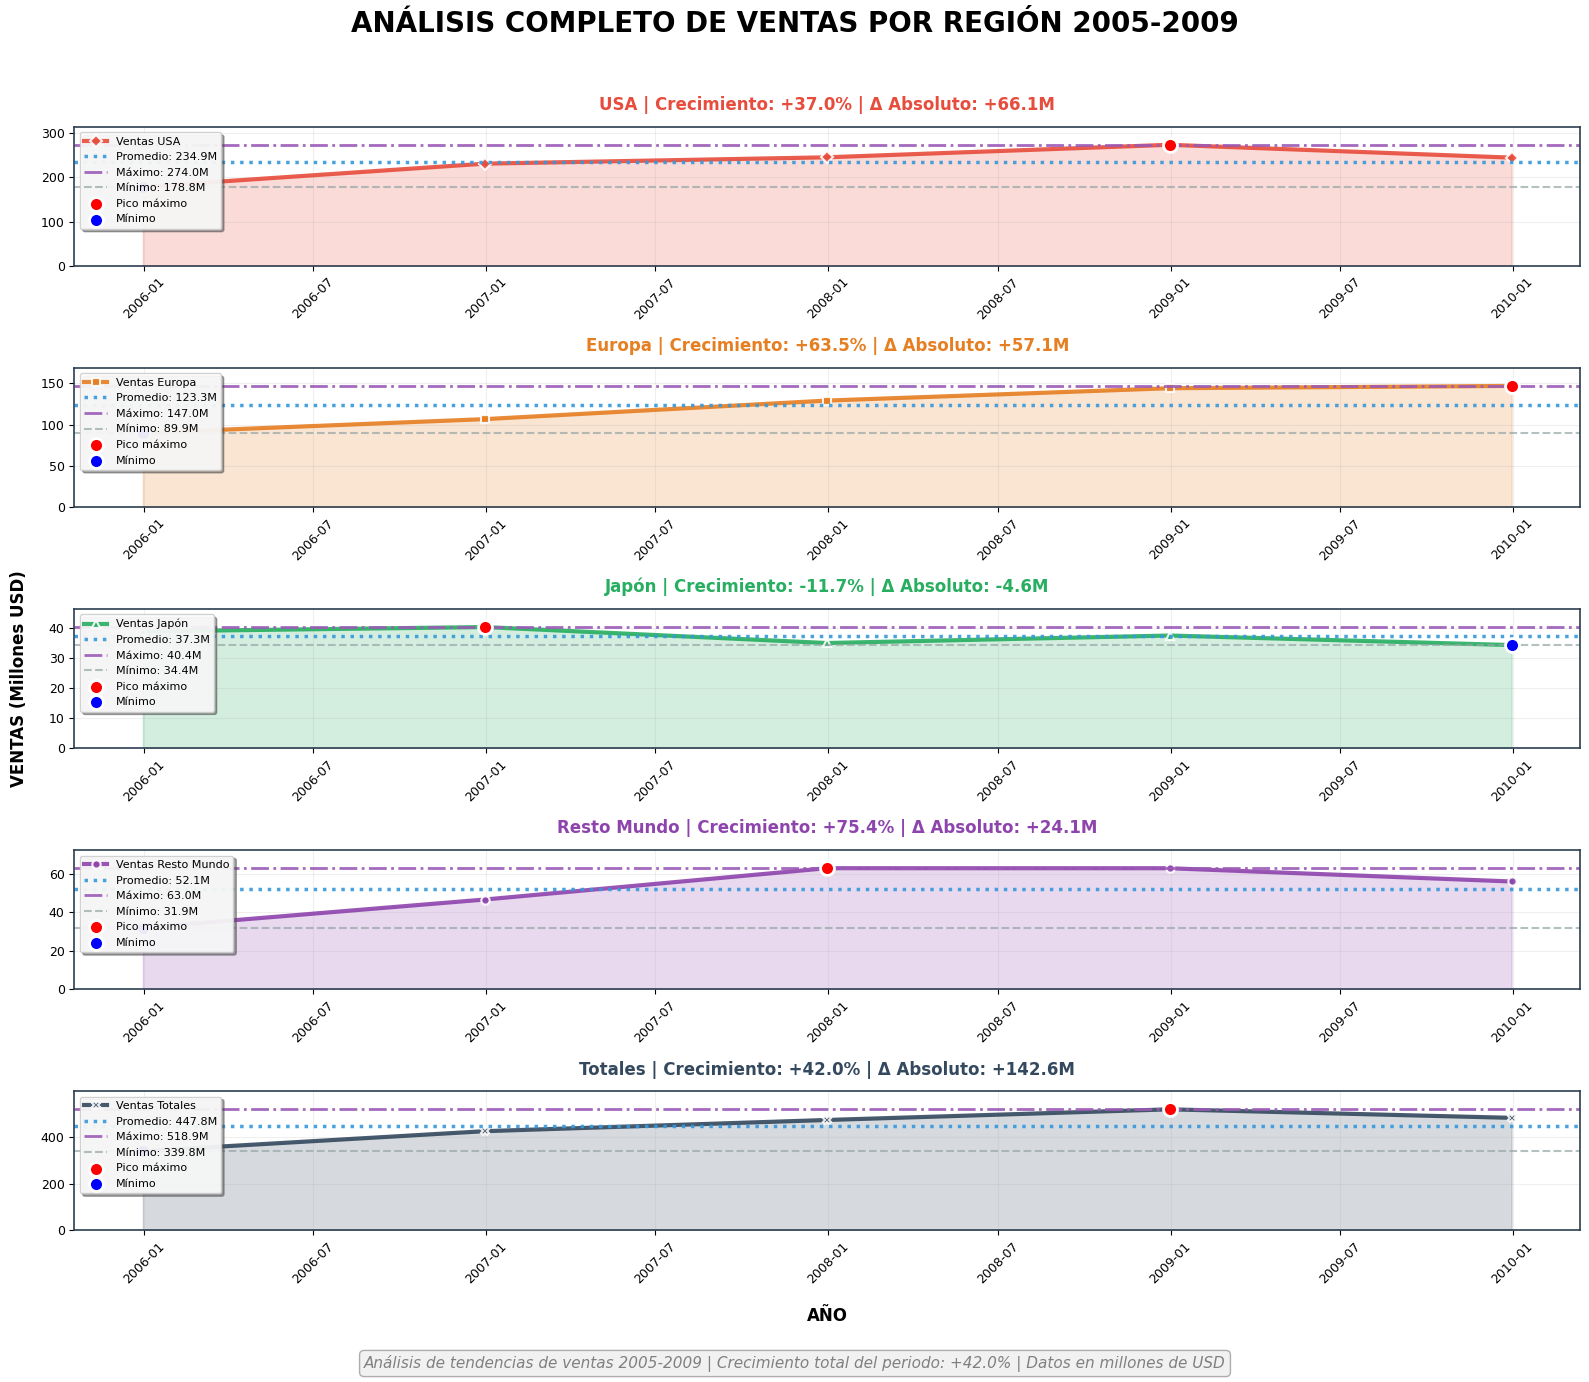

In [ ]:
# CONFIGURACIÓN PROFESIONAL MEJORADA - VERSIÓN DINÁMICA
fig, ax = plt.subplots(5, 1, figsize=(16, 14))

# Obtener años disponibles dinámicamente
años_disponibles = df_promedio_ventas_2.index.tolist()
año_inicio = años_disponibles[0]
año_fin = años_disponibles[-1]
periodo = f"{año_inicio}-{año_fin}"

fig.suptitle(f'ANÁLISIS COMPLETO DE VENTAS POR REGIÓN 2005-2009',
             fontsize=20, fontweight='bold', y=0.98)

# Configuración avanzada dinámica
configuraciones = {
    'USA': {'col': 'Ventas USA', 'color': '#E74C3C', 'marker': 'D'},
    'Europa': {'col': 'Ventas Europa', 'color': '#E67E22', 'marker': 's'},
    'Japón': {'col': 'Ventas Japon', 'color': '#27AE60', 'marker': '^'},
    'Resto Mundo': {'col': 'Ventas resto del Mundo', 'color': '#8E44AD', 'marker': 'o'},
    'Totales': {'col': 'Ventas Totales', 'color': '#34495E', 'marker': 'X'}
}

# Primero calcular límites Y dinámicamente
for region, config in configuraciones.items():
    if config['col'] in df_promedio_ventas_2.columns:
        data = df_promedio_ventas_2[config['col']]
        max_val = data.max()
        config['ylim'] = (0, max_val * 1.15)  # 15% de margen

for idx, (region, config) in enumerate(configuraciones.items()):
    try:
        if config['col'] not in df_promedio_ventas_2.columns:
            print(f"Advertencia: Columna {config['col']} no encontrada")
            continue

        data = df_promedio_ventas_2[config['col']]
        avg = data.mean()
        max_val = data.max()
        min_val = data.min()

        # Calcular métricas usando años disponibles
        valor_inicio = data.iloc[0]
        valor_fin = data.iloc[-1]
        crecimiento_absoluto = valor_fin - valor_inicio
        tasa_crecimiento = ((valor_fin - valor_inicio) / valor_inicio * 100) if valor_inicio != 0 else 0

        # Gráfico principal con marcadores diferenciados
        ax[idx].plot(data.index, data.values,
                     color=config['color'], linewidth=3, alpha=0.9,
                     marker=config['marker'], markersize=6,
                     markeredgecolor='white', markeredgewidth=1.5,
                     label=f'Ventas {region}')

        # Líneas de referencia mejoradas
        ax[idx].axhline(avg, color='#3498DB', linestyle=':', alpha=0.9, linewidth=2.5,
                       label=f'Promedio: {avg:.1f}M')
        ax[idx].axhline(max_val, color='#9B59B6', linestyle='-.', alpha=0.9, linewidth=2,
                       label=f'Máximo: {max_val:.1f}M')
        ax[idx].axhline(min_val, color='#95A5A6', linestyle='--', alpha=0.7, linewidth=1.5,
                       label=f'Mínimo: {min_val:.1f}M')

        # Rellenar área bajo la curva
        ax[idx].fill_between(data.index, data.values, alpha=0.2, color=config['color'])

        # Destacar puntos importantes
        ax[idx].scatter(data.idxmax(), max_val, color='red', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Pico máximo')
        ax[idx].scatter(data.idxmin(), min_val, color='blue', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Mínimo')

        # Configuración del subplot con más información
        color_crecimiento = '#27AE60' if tasa_crecimiento > 0 else '#E74C3C'
        ax[idx].set_title(f'{region} | Crecimiento: {tasa_crecimiento:+.1f}% | '
                         f'Δ Absoluto: {crecimiento_absoluto:+.1f}M',
                         fontsize=12, fontweight='bold', pad=12, color=config['color'])

        ax[idx].legend(loc='upper left', frameon=True, fancybox=True,
                      shadow=True, fontsize=8, framealpha=0.9)
        ax[idx].grid(True, alpha=0.2, linestyle='-')
        ax[idx].set_ylim(config['ylim'])

        # Mejorar etiquetas de ejes
        ax[idx].tick_params(axis='x', rotation=45, labelsize=9)
        ax[idx].tick_params(axis='y', labelsize=9)

        # Ejes
        if idx == 2:
            ax[idx].set_ylabel('VENTAS (Millones USD)', fontsize=12,
                              fontweight='bold', labelpad=15)
        if idx == 4:
            ax[idx].set_xlabel('AÑO', fontsize=12, fontweight='bold', labelpad=15)

        # Estética de spines mejorada
        for spine in ax[idx].spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('#2C3E50')

    except Exception as e:
        print(f"Error inesperado en {region}: {e}")
        continue

# Calcular métricas generales del periodo
columnas_ventas = [config['col'] for config in configuraciones.values()
                  if config['col'] in df_promedio_ventas_2.columns and config['col'] != 'Ventas Totales']

if columnas_ventas:
    try:
        total_inicio = sum(df_promedio_ventas_2[columnas_ventas].iloc[0])
        total_fin = sum(df_promedio_ventas_2[columnas_ventas].iloc[-1])
        crecimiento_total = ((total_fin - total_inicio) / total_inicio * 100)
    except:
        total_inicio = total_fin = crecimiento_total = 0
else:
    total_inicio = total_fin = crecimiento_total = 0

# Añadir anotación general mejorada
fig.text(0.5, 0.01,
         f'Análisis de tendencias de ventas 2005-2009 | '
         f'Crecimiento total del periodo: {crecimiento_total:+.1f}% | '
         f'Datos en millones de USD',
         ha='center', fontsize=11, style='italic', color='gray',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.3))

# Añadir cuadro resumen dinámico


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()



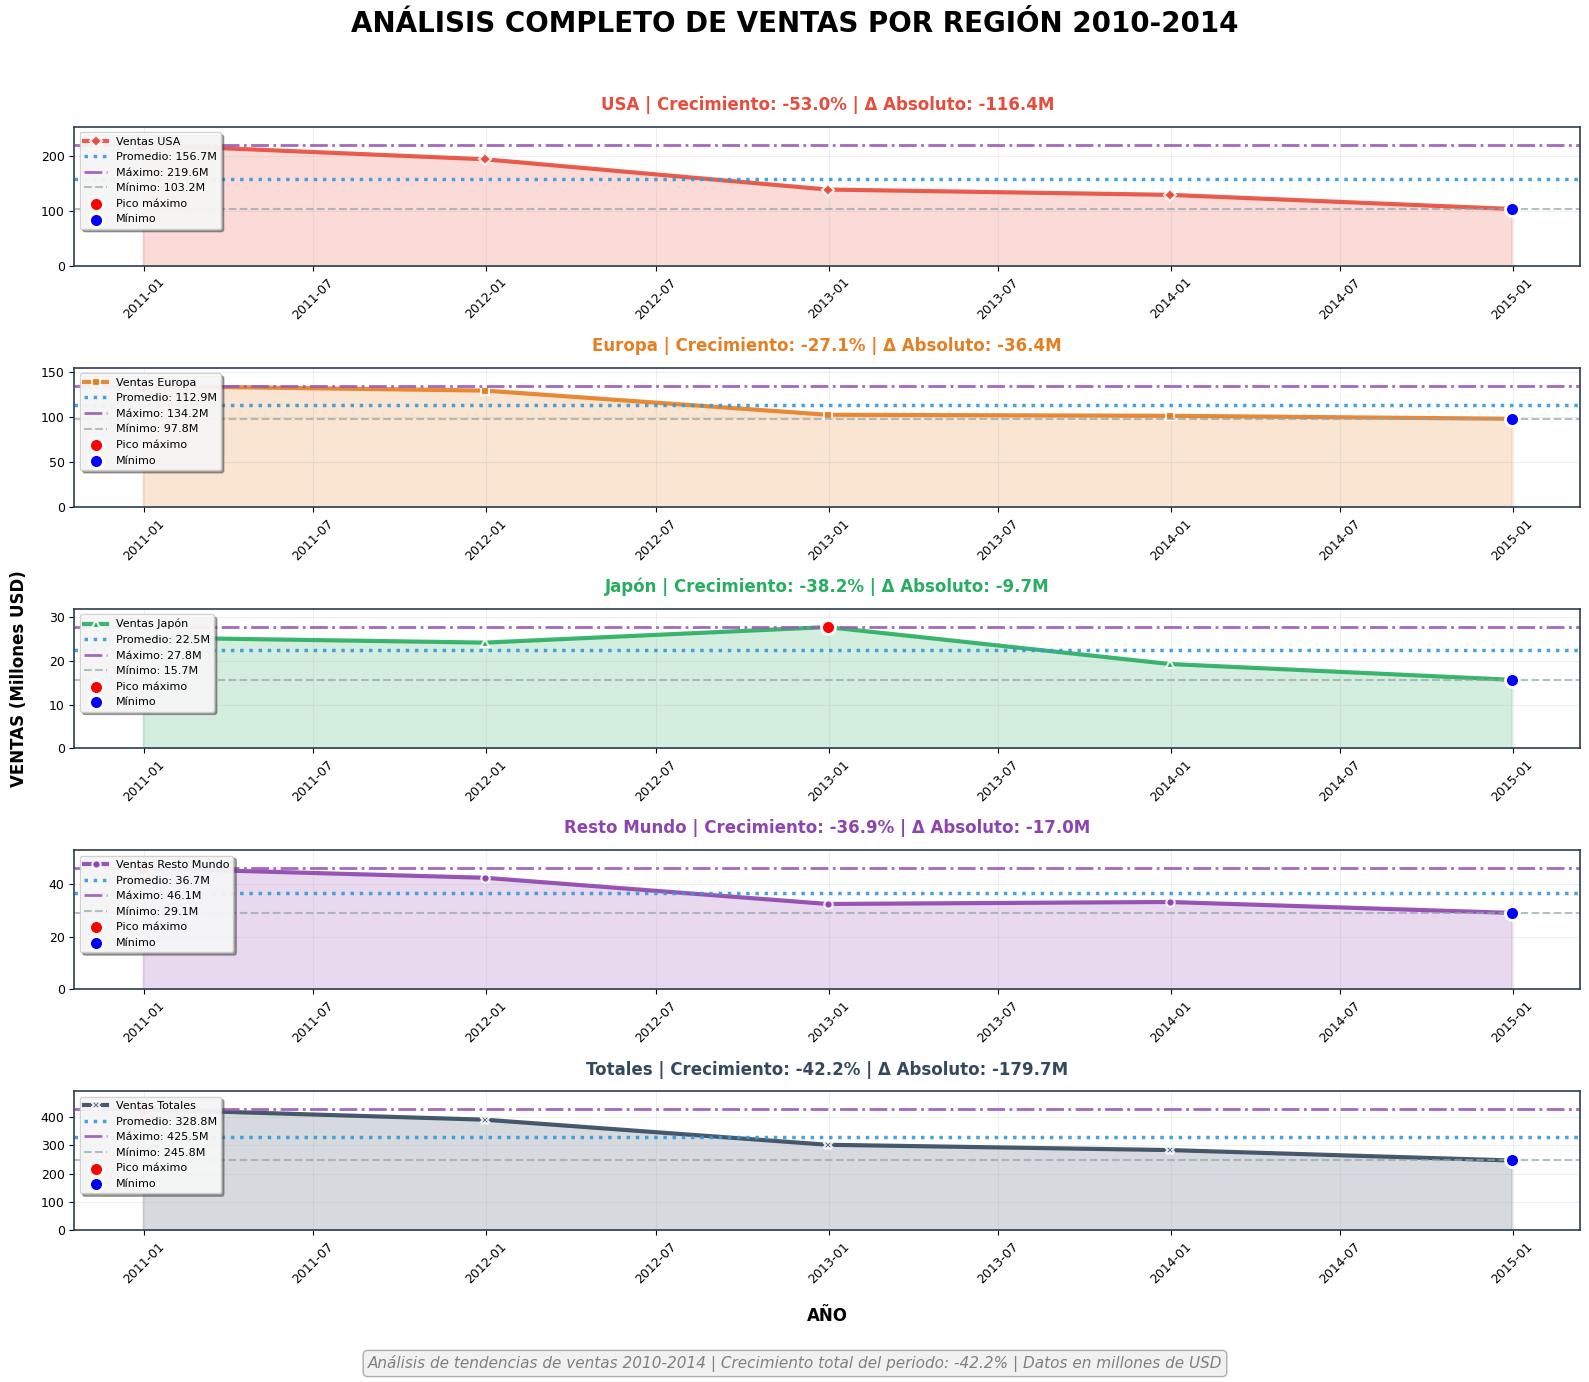

In [ ]:
# CONFIGURACIÓN PROFESIONAL MEJORADA - VERSIÓN DINÁMICA
fig, ax = plt.subplots(5, 1, figsize=(16, 14))

# Obtener años disponibles dinámicamente
años_disponibles = df_promedio_ventas_3.index.tolist()
año_inicio = años_disponibles[0]
año_fin = años_disponibles[-1]
periodo = f"{año_inicio}-{año_fin}"

fig.suptitle(f'ANÁLISIS COMPLETO DE VENTAS POR REGIÓN 2010-2014',
             fontsize=20, fontweight='bold', y=0.98)

# Configuración avanzada dinámica
configuraciones = {
    'USA': {'col': 'Ventas USA', 'color': '#E74C3C', 'marker': 'D'},
    'Europa': {'col': 'Ventas Europa', 'color': '#E67E22', 'marker': 's'},
    'Japón': {'col': 'Ventas Japon', 'color': '#27AE60', 'marker': '^'},
    'Resto Mundo': {'col': 'Ventas resto del Mundo', 'color': '#8E44AD', 'marker': 'o'},
    'Totales': {'col': 'Ventas Totales', 'color': '#34495E', 'marker': 'X'}
}

# Primero calcular límites Y dinámicamente
for region, config in configuraciones.items():
    if config['col'] in df_promedio_ventas_3.columns:
        data = df_promedio_ventas_3[config['col']]
        max_val = data.max()
        config['ylim'] = (0, max_val * 1.15)  # 15% de margen

for idx, (region, config) in enumerate(configuraciones.items()):
    try:
        if config['col'] not in df_promedio_ventas_3.columns:
            print(f"Advertencia: Columna {config['col']} no encontrada")
            continue

        data = df_promedio_ventas_3[config['col']]
        avg = data.mean()
        max_val = data.max()
        min_val = data.min()

        # Calcular métricas usando años disponibles
        valor_inicio = data.iloc[0]
        valor_fin = data.iloc[-1]
        crecimiento_absoluto = valor_fin - valor_inicio
        tasa_crecimiento = ((valor_fin - valor_inicio) / valor_inicio * 100) if valor_inicio != 0 else 0

        # Gráfico principal con marcadores diferenciados
        ax[idx].plot(data.index, data.values,
                     color=config['color'], linewidth=3, alpha=0.9,
                     marker=config['marker'], markersize=6,
                     markeredgecolor='white', markeredgewidth=1.5,
                     label=f'Ventas {region}')

        # Líneas de referencia mejoradas
        ax[idx].axhline(avg, color='#3498DB', linestyle=':', alpha=0.9, linewidth=2.5,
                       label=f'Promedio: {avg:.1f}M')
        ax[idx].axhline(max_val, color='#9B59B6', linestyle='-.', alpha=0.9, linewidth=2,
                       label=f'Máximo: {max_val:.1f}M')
        ax[idx].axhline(min_val, color='#95A5A6', linestyle='--', alpha=0.7, linewidth=1.5,
                       label=f'Mínimo: {min_val:.1f}M')

        # Rellenar área bajo la curva
        ax[idx].fill_between(data.index, data.values, alpha=0.2, color=config['color'])

        # Destacar puntos importantes
        ax[idx].scatter(data.idxmax(), max_val, color='red', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Pico máximo')
        ax[idx].scatter(data.idxmin(), min_val, color='blue', s=100, zorder=5,
                       edgecolors='white', linewidth=2, label='Mínimo')

        # Configuración del subplot con más información
        color_crecimiento = '#27AE60' if tasa_crecimiento > 0 else '#E74C3C'
        ax[idx].set_title(f'{region} | Crecimiento: {tasa_crecimiento:+.1f}% | '
                         f'Δ Absoluto: {crecimiento_absoluto:+.1f}M',
                         fontsize=12, fontweight='bold', pad=12, color=config['color'])

        ax[idx].legend(loc='upper left', frameon=True, fancybox=True,
                      shadow=True, fontsize=8, framealpha=0.9)
        ax[idx].grid(True, alpha=0.2, linestyle='-')
        ax[idx].set_ylim(config['ylim'])

        # Mejorar etiquetas de ejes
        ax[idx].tick_params(axis='x', rotation=45, labelsize=9)
        ax[idx].tick_params(axis='y', labelsize=9)

        # Ejes
        if idx == 2:
            ax[idx].set_ylabel('VENTAS (Millones USD)', fontsize=12,
                              fontweight='bold', labelpad=15)
        if idx == 4:
            ax[idx].set_xlabel('AÑO', fontsize=12, fontweight='bold', labelpad=15)

        # Estética de spines mejorada
        for spine in ax[idx].spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('#2C3E50')

    except Exception as e:
        print(f"Error inesperado en {region}: {e}")
        continue

# Calcular métricas generales del periodo
columnas_ventas = [config['col'] for config in configuraciones.values()
                  if config['col'] in df_promedio_ventas_3.columns and config['col'] != 'Ventas Totales']

if columnas_ventas:
    try:
        total_inicio = sum(df_promedio_ventas_3[columnas_ventas].iloc[0])
        total_fin = sum(df_promedio_ventas_3[columnas_ventas].iloc[-1])
        crecimiento_total = ((total_fin - total_inicio) / total_inicio * 100)
    except:
        total_inicio = total_fin = crecimiento_total = 0
else:
    total_inicio = total_fin = crecimiento_total = 0

# Añadir anotación general mejorada
fig.text(0.5, 0.01,
         f'Análisis de tendencias de ventas 2010-2014 | '
         f'Crecimiento total del periodo: {crecimiento_total:+.1f}% | '
         f'Datos en millones de USD',
         ha='center', fontsize=11, style='italic', color='gray',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.3))

# Añadir cuadro resumen dinámico


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()



# Conclusiones Preliminares

Las conclusiones que puedo realizar hasta ahora despues de haber